In [6]:
from atom import ATOMClassifier
from atom.feature_engineering import FeatureSelector
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
import sys
import os
from pathlib import Path
import pandas as pd
import joblib
from sklearn.impute import KNNImputer
from sklearn.preprocessing import RobustScaler
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..', 'src')))
import func_classes

In [2]:
# Get the working directory
input_path = Path.cwd()
root = input_path.parent
data_path = root / "data" / "dev_set_final.csv"
train_df = pd.read_csv(data_path, header=0)
test_df = pd.read_csv(root / "data" / "eval_set_final.csv", header=0)
train_df.head()

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0          1    -0.102865      0.685403       -0.126342  -0.093143   
1          1     0.746094     -0.576609        0.735505   0.774476   
2          1     1.256510     -1.506800        1.343951   1.402888   
3          1     3.660156      0.875068        3.466356   5.180011   
4          1    -0.087240      0.660018        0.000358  -0.102518   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0        -0.247408         -0.520330       -0.111809            -0.110824   
1        -0.025271          0.703912        0.599209             0.768669   
2         1.171520          2.867781        2.342558             2.323853   
3         0.712979          1.540197        2.216439             3.149202   
4         0.682410          1.363083        1.075550             0.732167   

   symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0      -0.601156  ...     -0.033643       0.947093        -0.109331   
1      -0.031792  ...      0.722444      -0.377326         0.685936   
2       1.809249  ...      1.894644      -0.918023         2.172439   
3       0.020231  ...      3.265162       0.886628         3.064834   
4       0.953757  ...      0.092076       0.572674         0.217552   

   area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0   -0.009327          0.347352          -0.325847         0.025891   
1    0.767430          0.397196           1.322918         1.068668   
2    2.537705          0.860748           2.538150         1.880300   
3    4.770601          0.512461           1.075185         1.212758   
4    0.088420          1.462617           1.805552         1.566229   

   concave points_worst  symmetry_worst  fractal_dimension_worst  
0             -0.029405        0.004476                 0.022014  
1              1.111849        0.287952                 0.550844  
2              1.844805        2.648266                 1.934709  
3              1.881834        0.044759                 0.029518  
4              0.516903        0.866841                 2.204878  

[5 rows x 31 columns]

In [4]:
# Apply undersampling on dev_set
utils = func_classes.Utils()
dev_set_undersampled = utils.undersample_cc(train_df)
# Save the undersampled dataframe
dev_set_undersampled.to_csv(root/'data'/'dev_set_undersampled.csv', index=False)
dev_set_undersampled.head()
print(f"Shape of the undersampled dataframe: {dev_set_undersampled.shape}")
print(f"Number of 0 class: {len(dev_set_undersampled[dev_set_undersampled['diagnosis'] == 0])}")
print(f"Number of 1 class: {len(dev_set_undersampled[dev_set_undersampled['diagnosis'] == 1])}")


Shape of the undersampled dataframe: (282, 31)
Number of 0 class: 141
Number of 1 class: 141


/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:474: FutureWarning:

`BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.



Processing fold: 0
<< ================== ATOM ================== >>

Configuration ==================== >>
Algorithm task: Binary classification.

Dataset stats ==================== >>
Shape: (225, 31)
Train set size: 180
Test set size: 45
-------------------------------------
Memory: 55.93 kB
Scaled: False
Outlier values: 59 (1.1%)


Training ========================= >>
Models: LGB, LDA, LR, GNB, RF, SVM
Metric: fbeta_score


Results for LightGBM:
Fit ---------------------------------------------
Train evaluation --> fbeta_score: 1.0
Test evaluation --> fbeta_score: 0.9777
Time elapsed: 0.354s
-------------------------------------------------
Time: 0.354s


Results for LinearDiscriminantAnalysis:
Fit ---------------------------------------------
Train evaluation --> fbeta_score: 0.9777
Test evaluation --> fbeta_score: 1.0
Time elapsed: 0.016s
-------------------------------------------------
Time: 0.016s


Results for LogisticRegression:
Fit ------------------------------------------

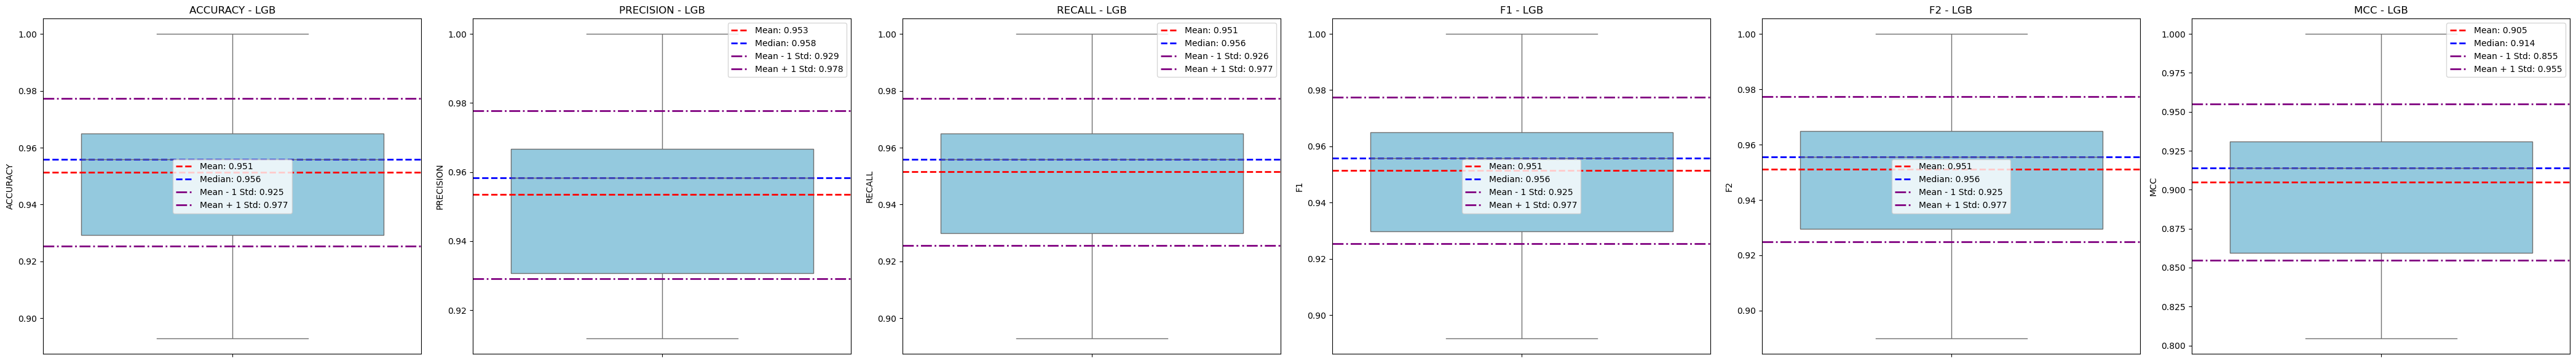

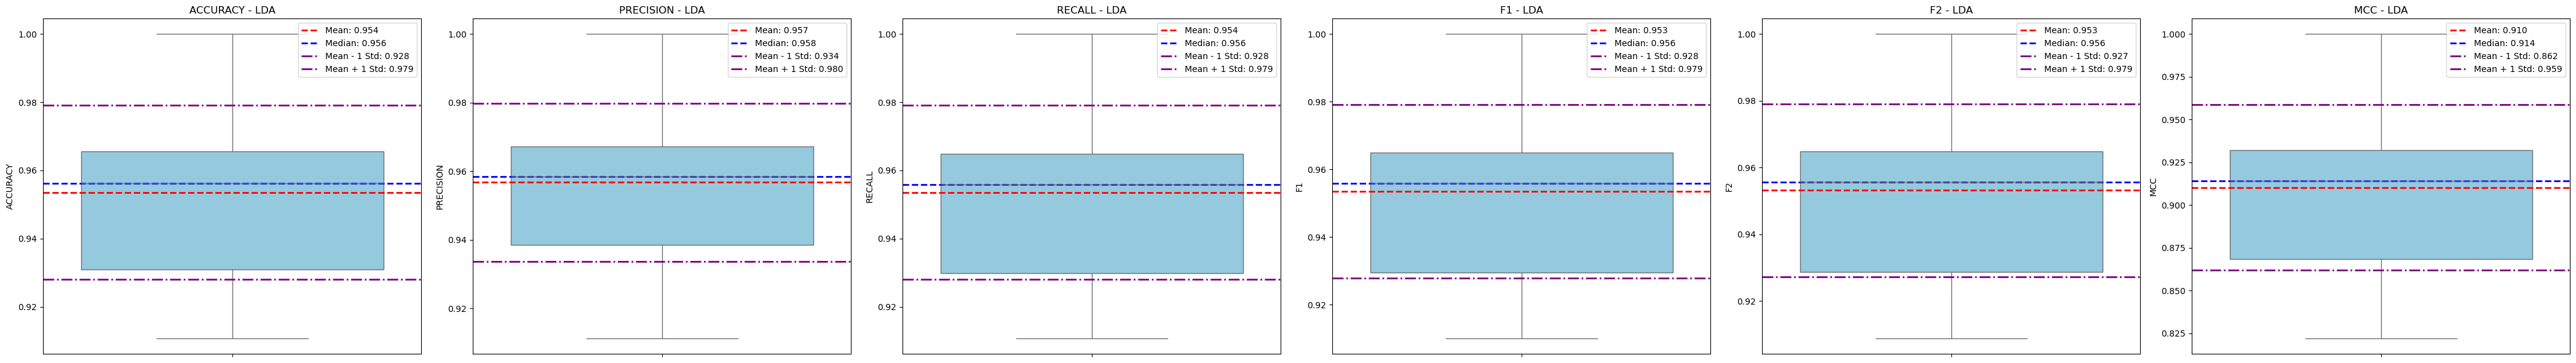

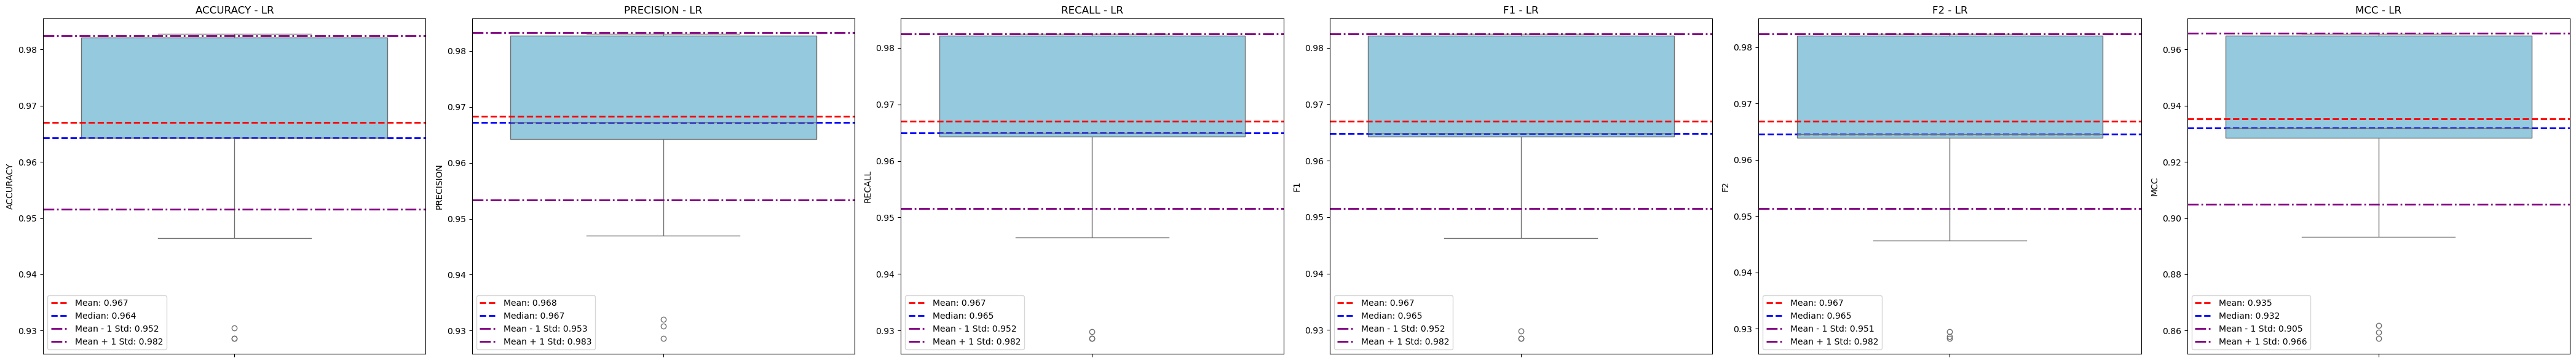

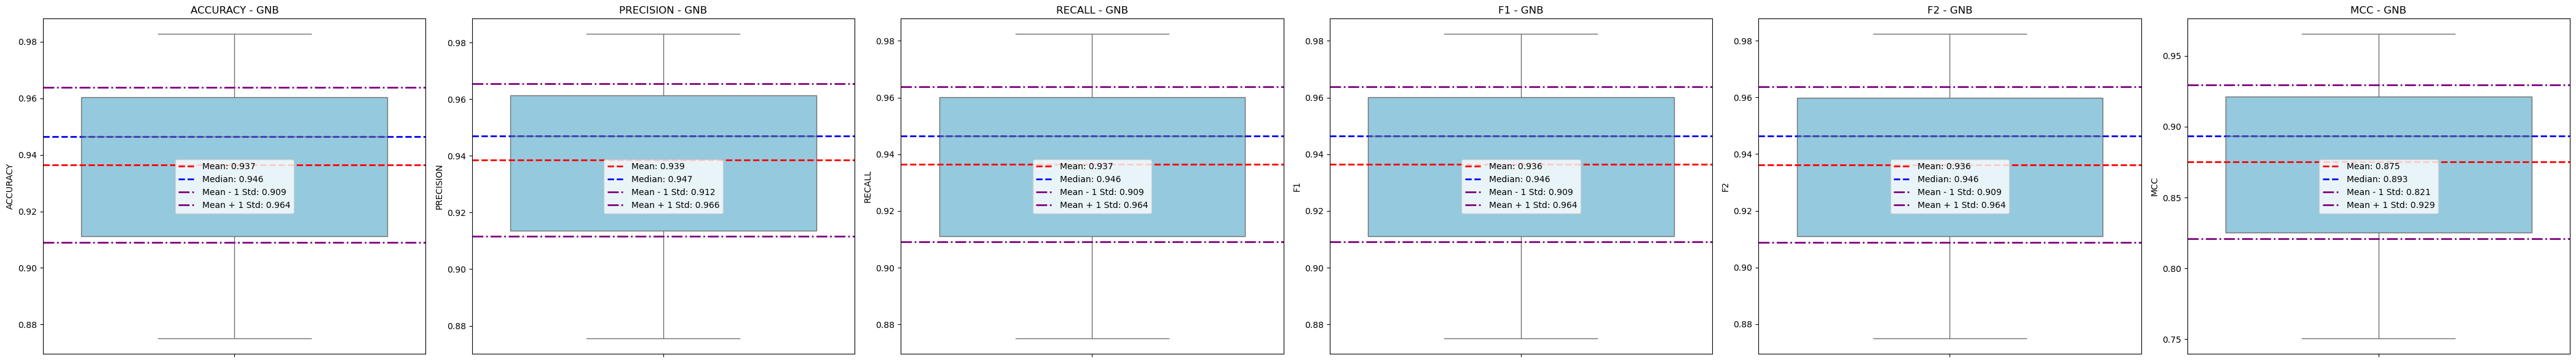

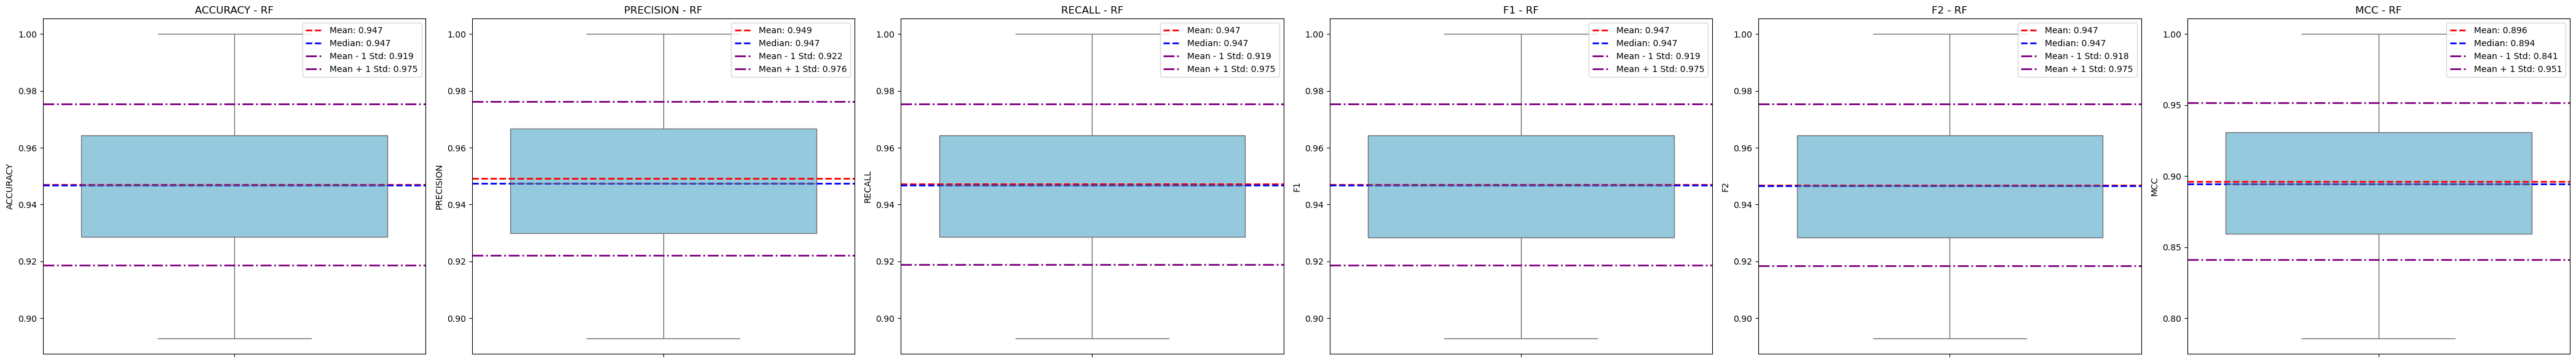

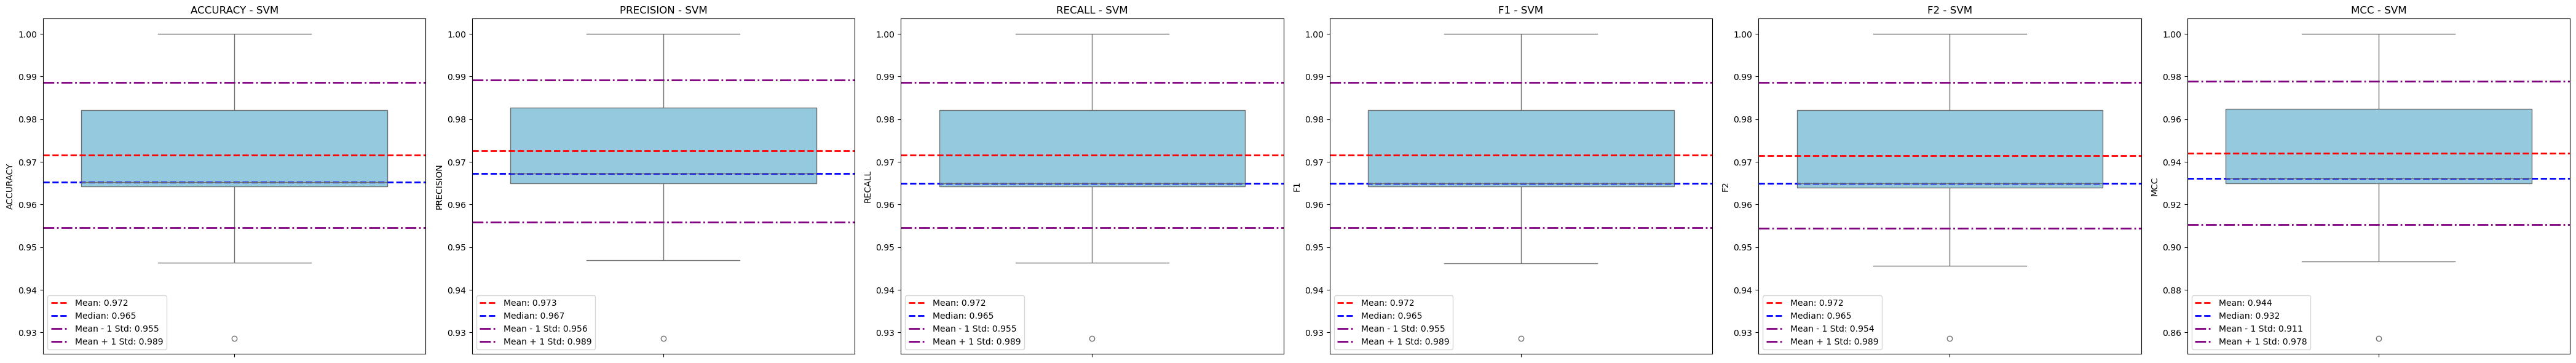

In [5]:
undersampled_dev = pd.read_csv("/Users/rafailadam/Downloads/mlincompbio/Assignment-2/data/dev_set_undersampled.csv", header=0)
utils = func_classes.Utils()
rncv = func_classes.RNcvAtom(
    X=undersampled_dev.drop(columns=["diagnosis"]),
    y=undersampled_dev["diagnosis"],
    models = ["LGB", "LDA", "LR", "GNB", "RF", "SVM"],
    fs=False
)
# Run all models with default parameters
rncv.baseline_run()
results = rncv.get_baseline_results()
# Get the best model from the inner CV results (VOTING)
inner_cv_results = rncv.get_best_from_inner_cv()
results.to_csv(root/'data'/'results_undersampled.csv', index=False)
inner_cv_results.to_csv(root/'data'/'inner_cv_results_undersampled.csv', index=False)

# Get the best model from the inner CV results
utils.get_best_from_folds(results=root/'data'/'inner_cv_results_undersampled.csv')

# Define the metrics you want to visualize for outer CV
metrics = ["accuracy", "precision", "recall", "f1", "f2", "mcc"]

# Create boxplots for each model
for model in ["LGB", "LDA", "LR", "GNB", "RF", "SVM"]:
    utils.create_boxplot(
        df=results,
        model_name=model,
        metrics=metrics
    )

In [7]:
# Perform PCA on the undersampled dataset
pca = PCA(n_components=0.95)
pca.fit(undersampled_dev.drop(columns=['diagnosis']))
print(pca.n_components_)

10


Processing fold: 0
<< ================== ATOM ================== >>

Configuration ==================== >>
Algorithm task: Binary classification.

Dataset stats ==================== >>
Shape: (225, 11)
Train set size: 180
Test set size: 45
-------------------------------------
Memory: 19.93 kB
Scaled: False
Outlier values: 27 (1.4%)


Training ========================= >>
Models: LGB, LDA, LR, GNB, RF, SVM
Metric: fbeta_score


Results for LightGBM:
Fit ---------------------------------------------
Train evaluation --> fbeta_score: 1.0
Test evaluation --> fbeta_score: 0.9551
Time elapsed: 0.204s
-------------------------------------------------
Time: 0.204s


Results for LinearDiscriminantAnalysis:
Fit ---------------------------------------------
Train evaluation --> fbeta_score: 0.9777
Test evaluation --> fbeta_score: 0.9556
Time elapsed: 0.012s
-------------------------------------------------
Time: 0.012s


Results for LogisticRegression:
Fit ---------------------------------------

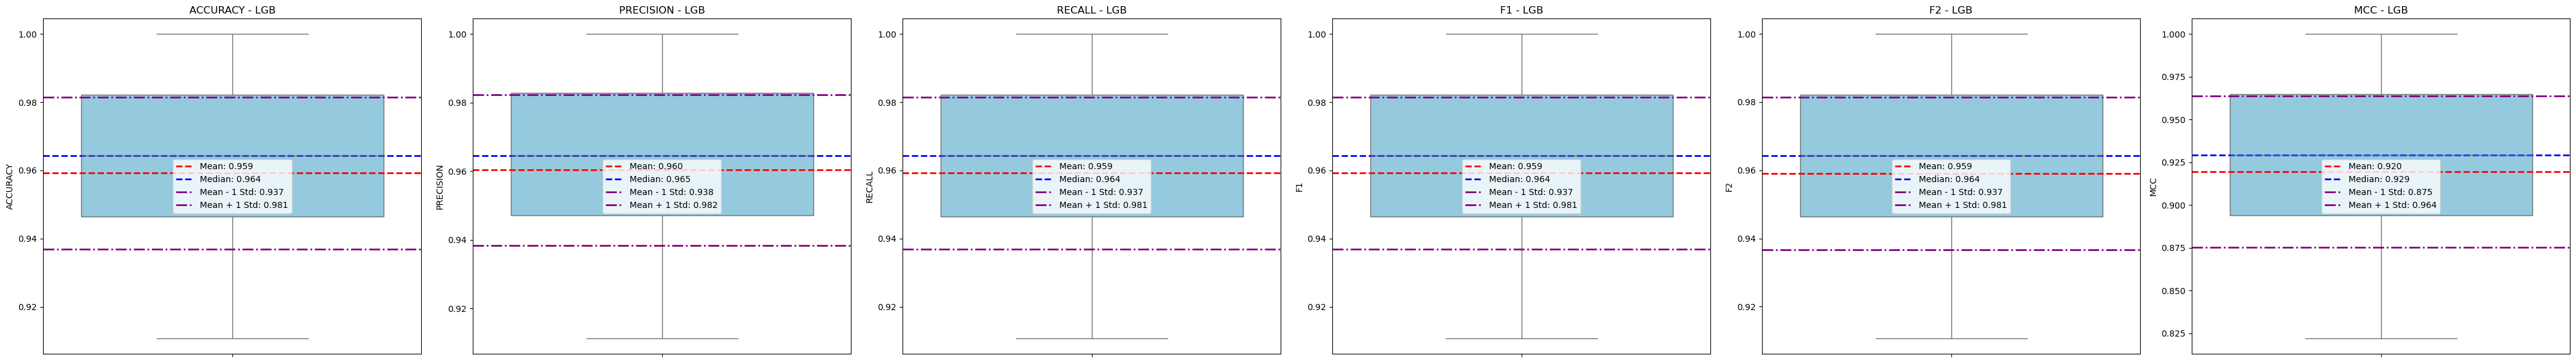

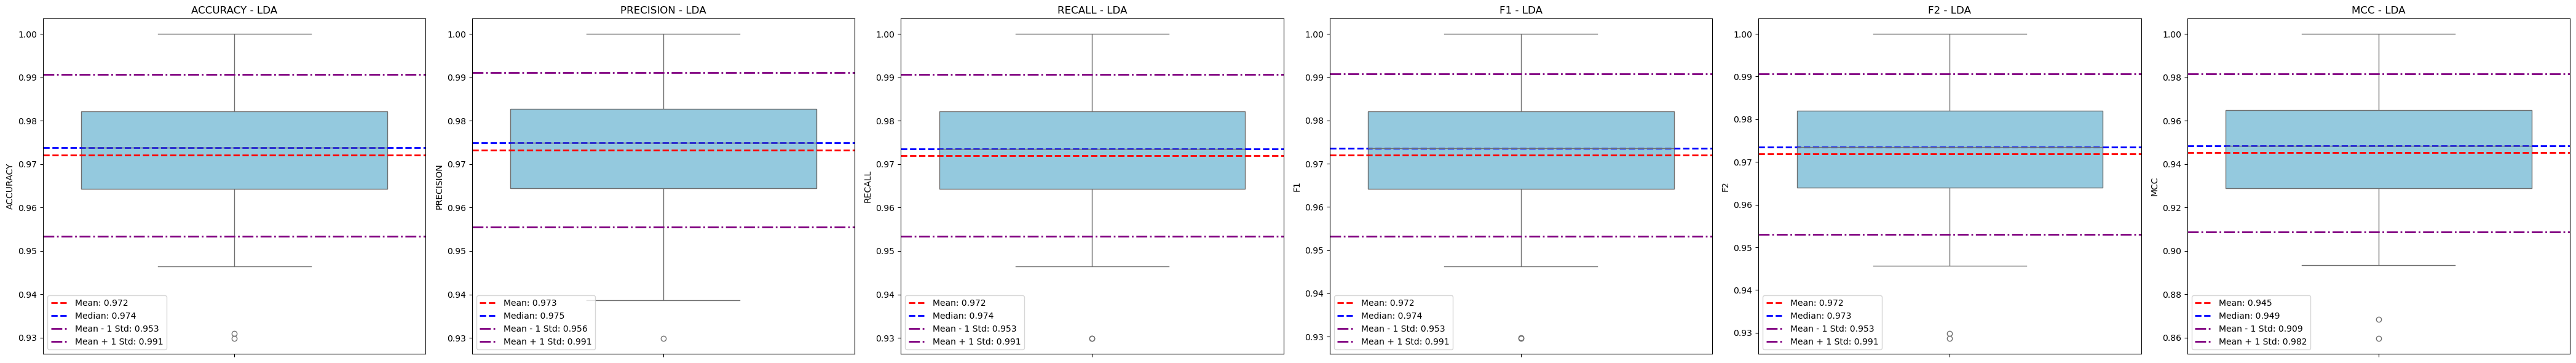

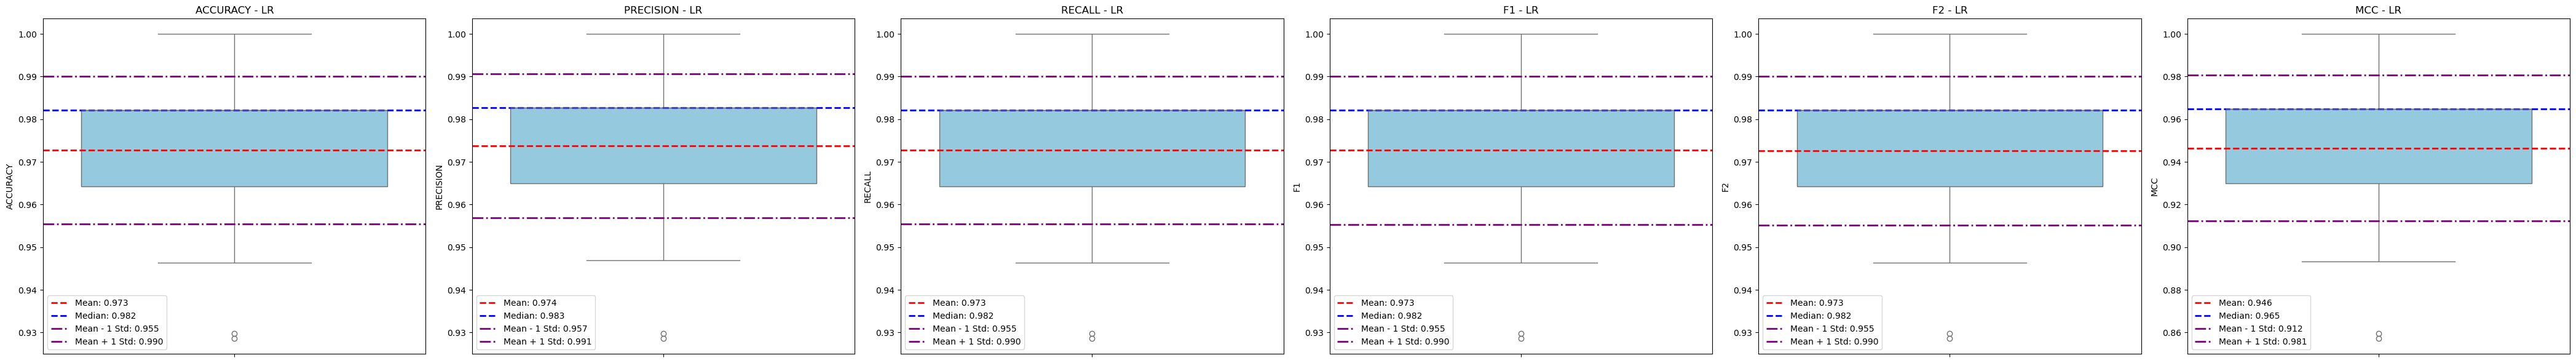

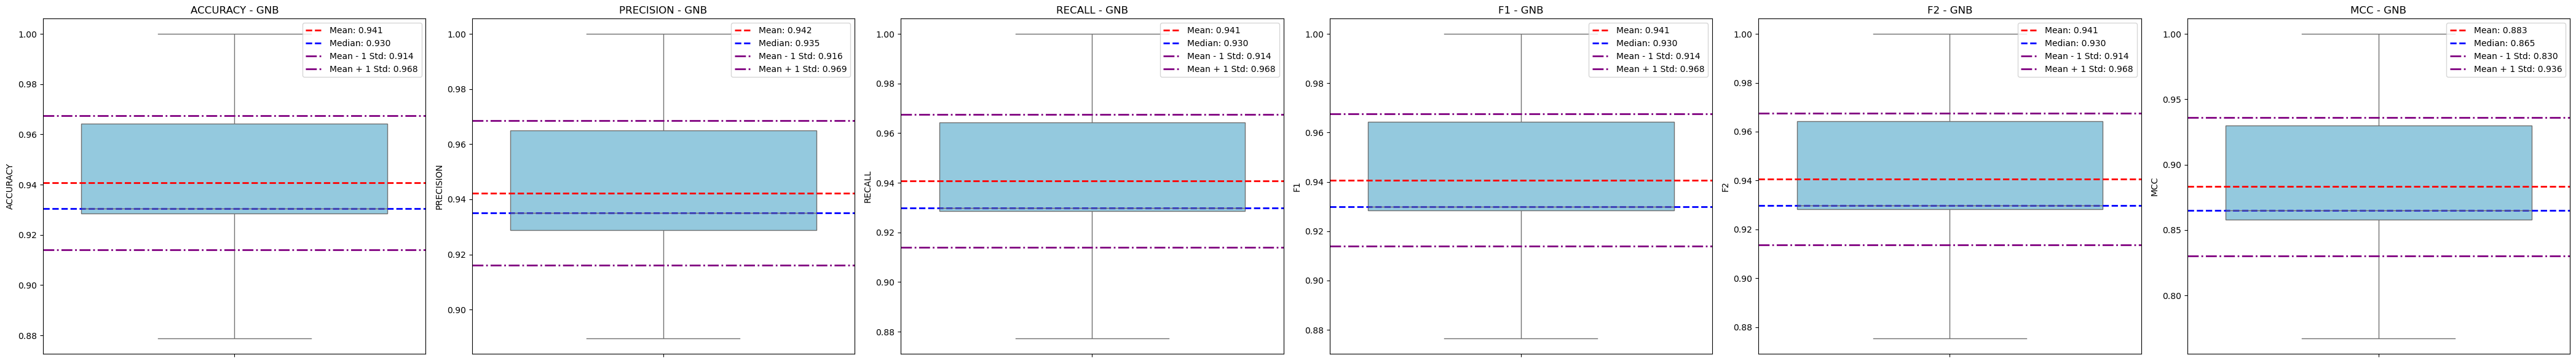

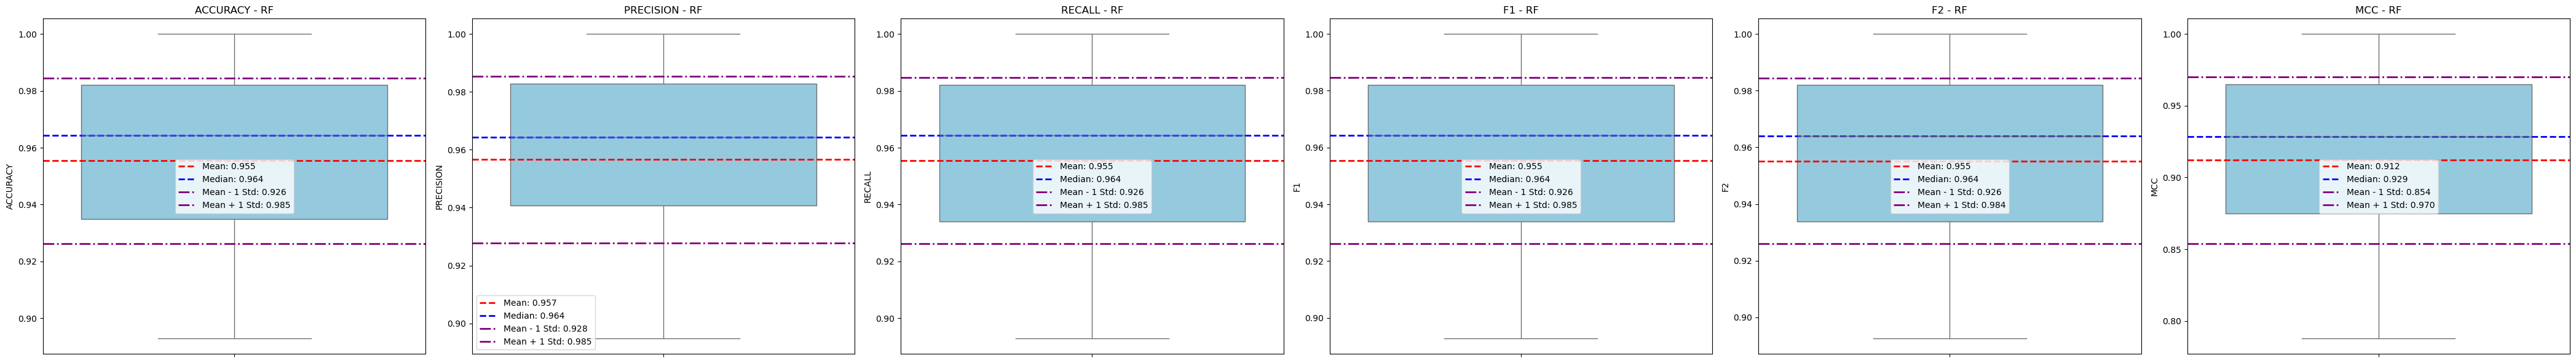

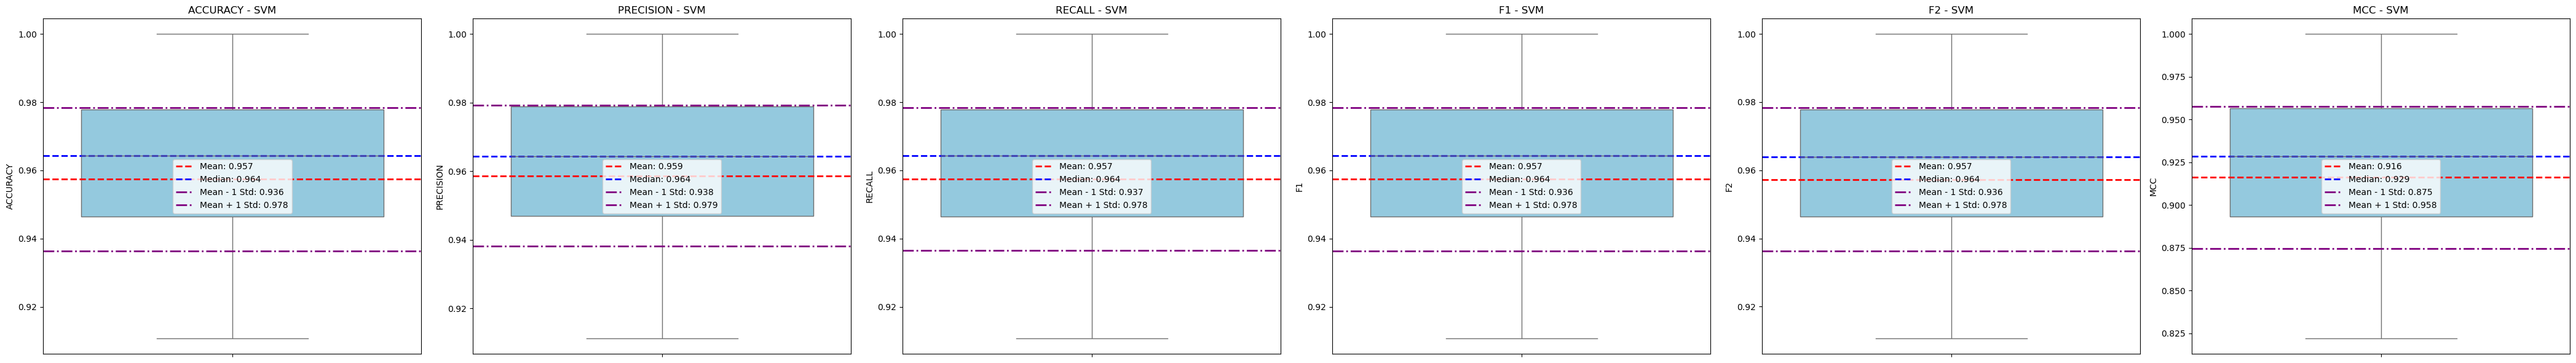

In [8]:
# Baseline runs with PCA feature selection
utils = func_classes.Utils()
rncv = func_classes.RNcvAtom(
    X=undersampled_dev.drop(columns=["diagnosis"]),
    y=undersampled_dev["diagnosis"],
    models = ["LGB", "LDA", "LR", "GNB", "RF", "SVM"],
    fs=True
)
rncv.baseline_run()
results = rncv.get_baseline_results()
inner_cv_results = rncv.get_best_from_inner_cv()
results.to_csv(root/'data'/'results_PCA_10_undersampled.csv', index=False)
inner_cv_results.to_csv(root/'data'/'inner_cv_results_PCA_10_undersampled.csv', index=False)

# Get the best model from the inner CV results
utils.get_best_from_folds(results=root/'data'/'inner_cv_results_PCA_10_undersampled.csv')

# Define the metrics you want to visualize
metrics = ["accuracy", "precision", "recall", "f1", "f2", "mcc"]

# Create boxplots for each model
for model in ["LGB", "LDA", "LR", "GNB", "RF", "SVM"]:
    utils.create_boxplot(
        df=results,
        model_name=model,
        metrics=metrics
    )

<< ================== ATOM ================== >>

Configuration ==================== >>
Algorithm task: Binary classification.

Dataset stats ==================== >>
Shape: (282, 31)
Train set size: 226
Test set size: 56
-------------------------------------
Memory: 70.07 kB
Scaled: False
Outlier values: 61 (0.9%)


Training ========================= >>
Models: LGB, LDA, LR, GNB, RF, SVM
Metric: fbeta_score


Results for LightGBM:
Fit ---------------------------------------------
Train evaluation --> fbeta_score: 1.0
Test evaluation --> fbeta_score: 0.964
Time elapsed: 0.284s
-------------------------------------------------
Time: 0.284s


Results for LinearDiscriminantAnalysis:
Fit ---------------------------------------------
Train evaluation --> fbeta_score: 0.9689
Test evaluation --> fbeta_score: 1.0
Time elapsed: 0.014s
-------------------------------------------------
Time: 0.014s


Results for LogisticRegression:
Fit ---------------------------------------------
Train evaluation

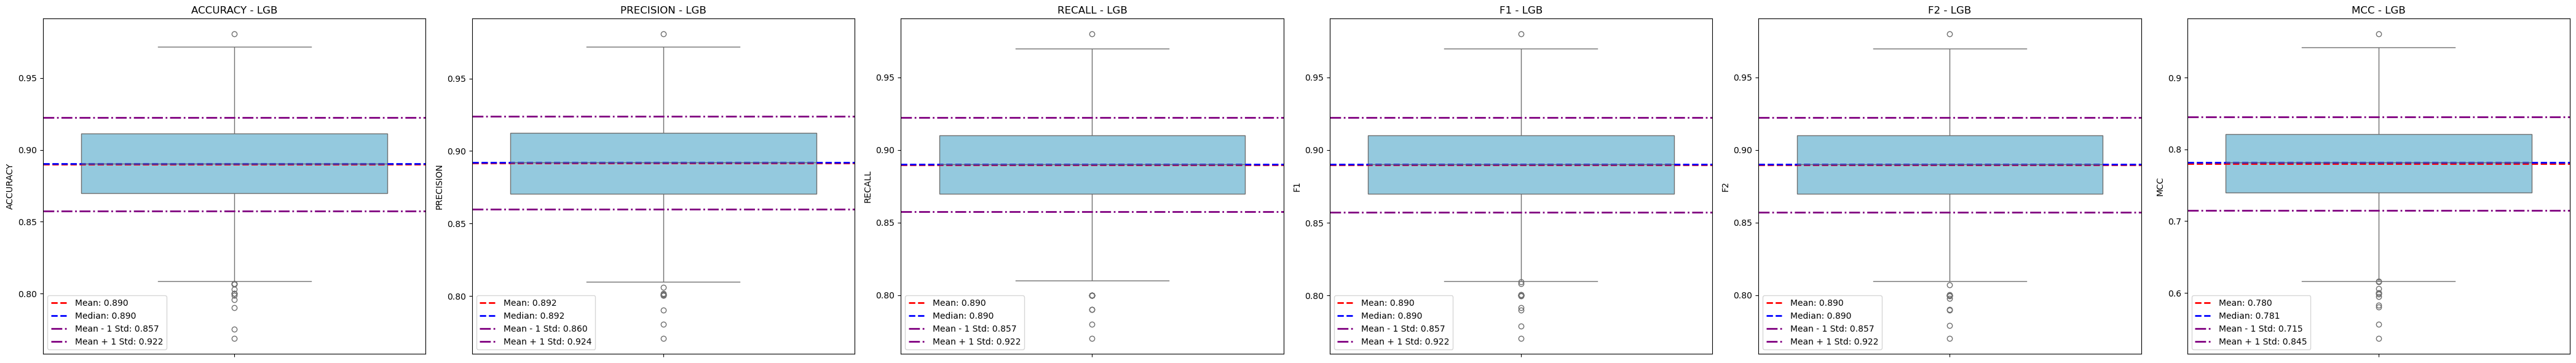

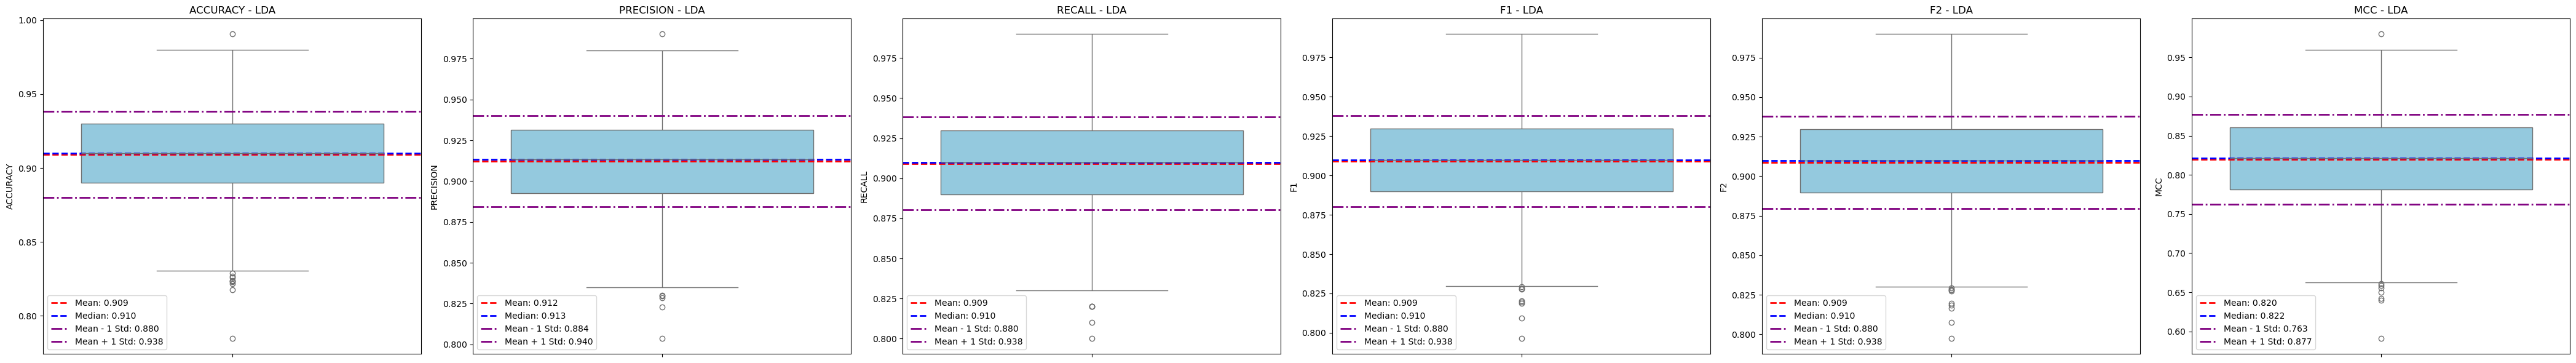

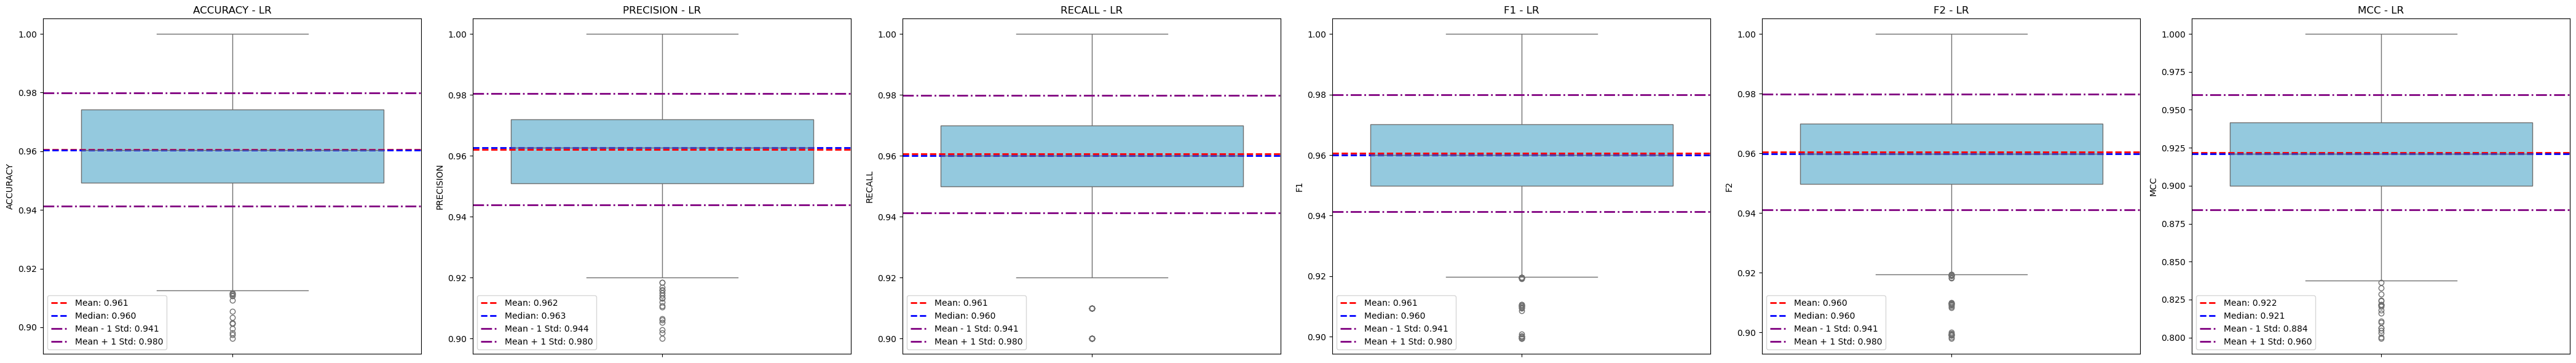

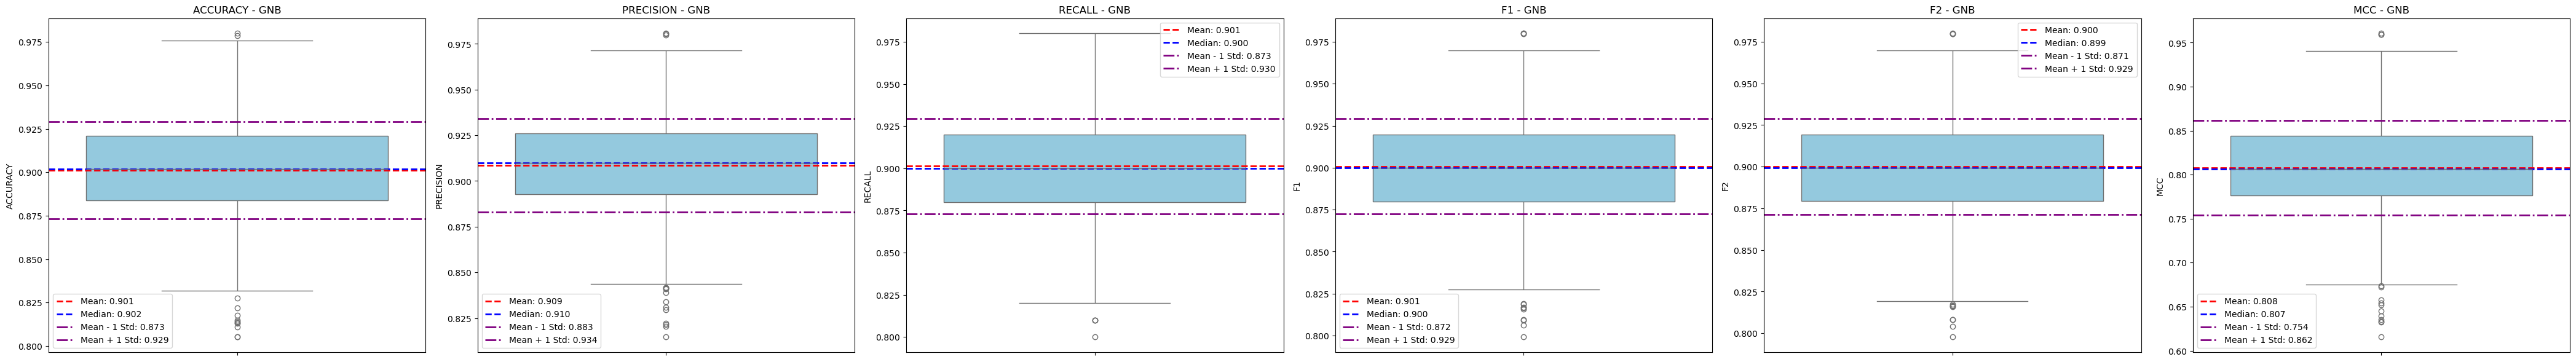

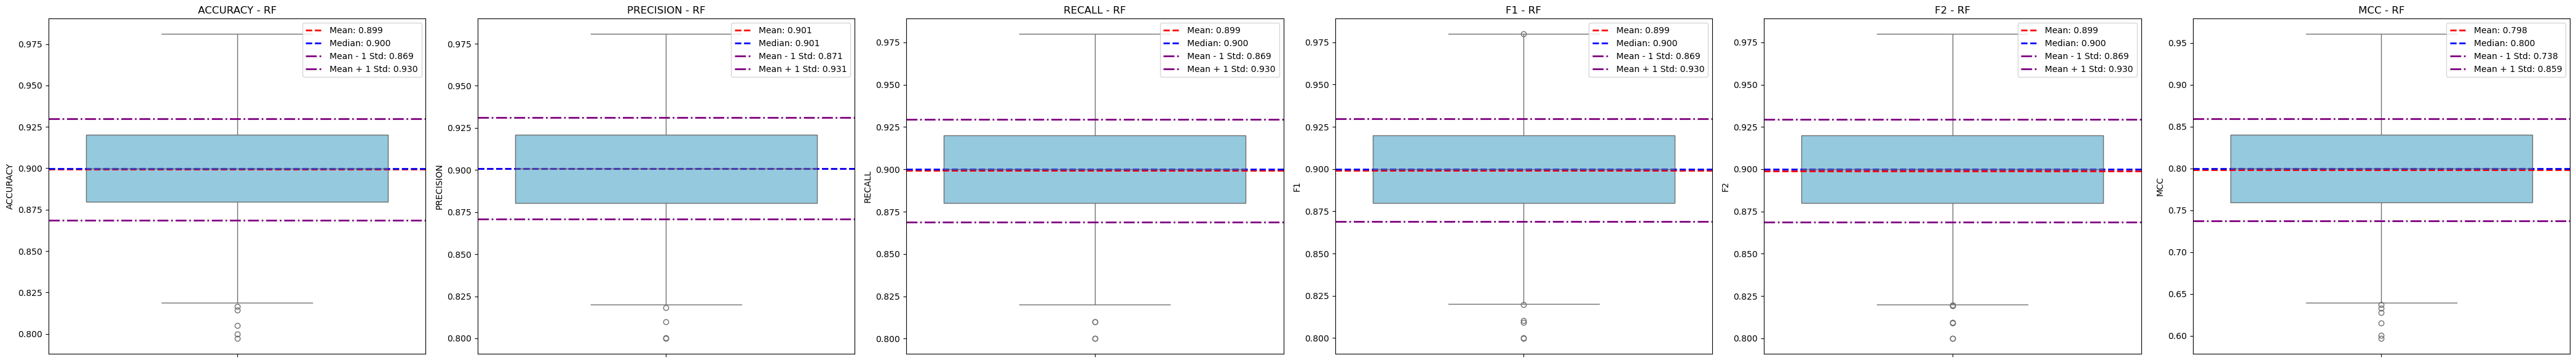

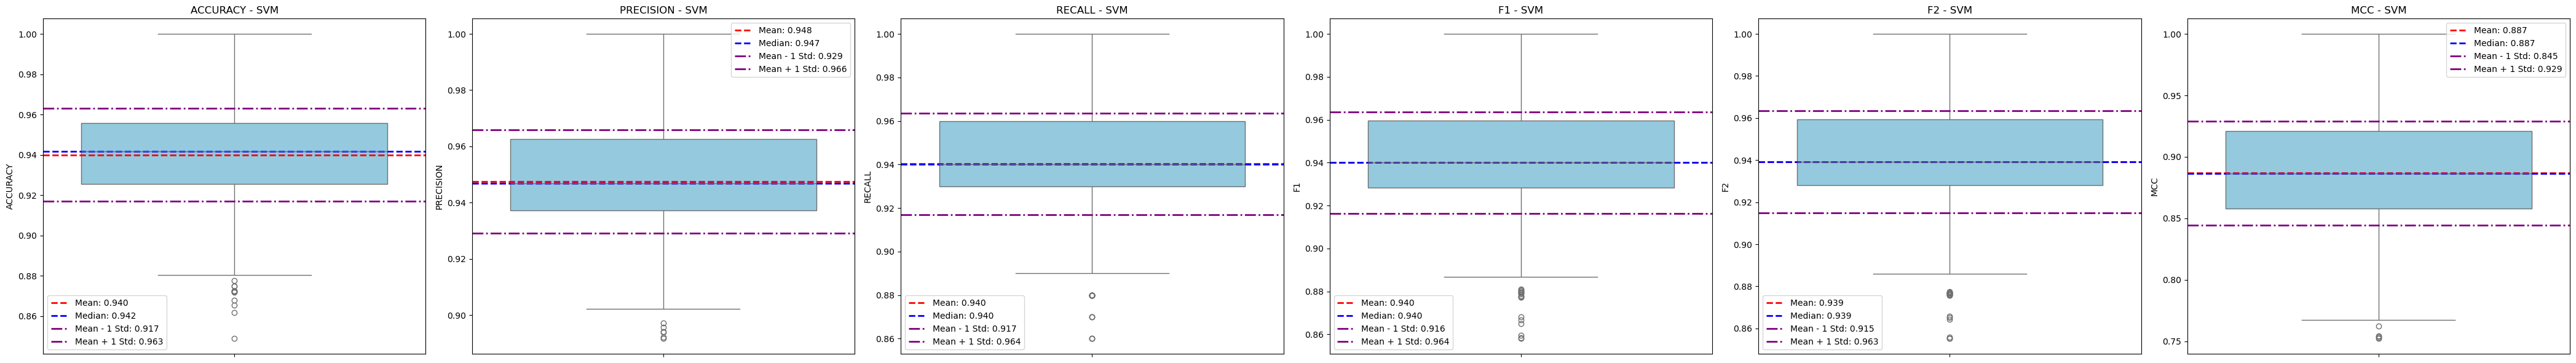

In [9]:
# Define the models you want to evaluate on the bootstrapped data on eval set
models = ["LGB", "LDA", "LR", "GNB", "RF", "SVM"]

# Define the metrics you want to evaluate
metrics = ["accuracy", "precision", "recall", "f1", "f2", "mcc"]

# Create a new RNcvAtom instance
rncv = func_classes.RNcvAtom(
    X=undersampled_dev.drop(columns=["diagnosis"]),
    y=undersampled_dev["diagnosis"],
    models=models,
    fs=False
)
rncv.bootstrap(train_set=undersampled_dev, eval_set=test_df)
results = rncv.get_bootstrap_results()
results.to_csv(root/'data'/'bootstrap_results_undersampled.csv', index=False)

utils = func_classes.Utils()
for model in models:
    utils.create_boxplot(
        df=results,
        model_name=model,
        metrics=metrics
    )

<< ================== ATOM ================== >>

Configuration ==================== >>
Algorithm task: Binary classification.

Dataset stats ==================== >>
Shape: (282, 11)
Train set size: 226
Test set size: 56
-------------------------------------
Memory: 24.95 kB
Scaled: False
Outlier values: 26 (1.0%)


Training ========================= >>
Models: LGB, LDA, LR, GNB, RF, SVM
Metric: fbeta_score


Results for LightGBM:
Fit ---------------------------------------------
Train evaluation --> fbeta_score: 1.0
Test evaluation --> fbeta_score: 0.9821
Time elapsed: 0.204s
-------------------------------------------------
Time: 0.204s


Results for LinearDiscriminantAnalysis:
Fit ---------------------------------------------
Train evaluation --> fbeta_score: 0.9822
Test evaluation --> fbeta_score: 0.9821
Time elapsed: 0.014s
-------------------------------------------------
Time: 0.014s


Results for LogisticRegression:
Fit ---------------------------------------------
Train evalua

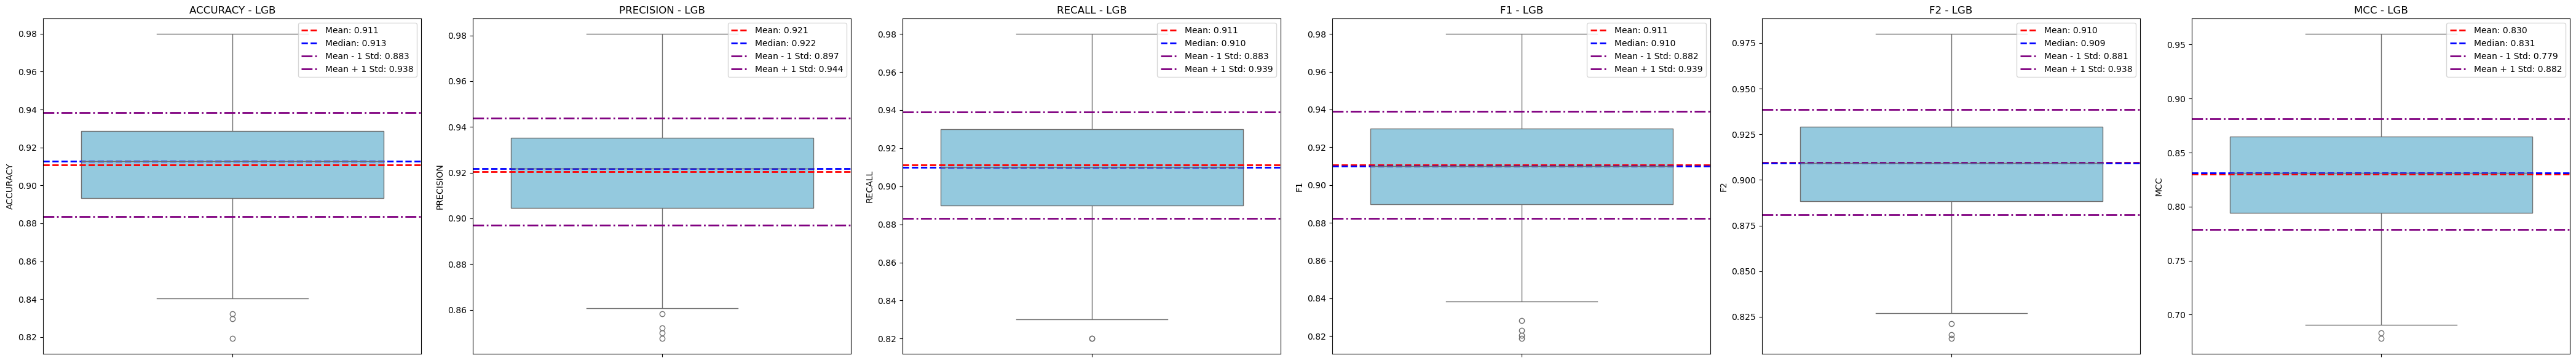

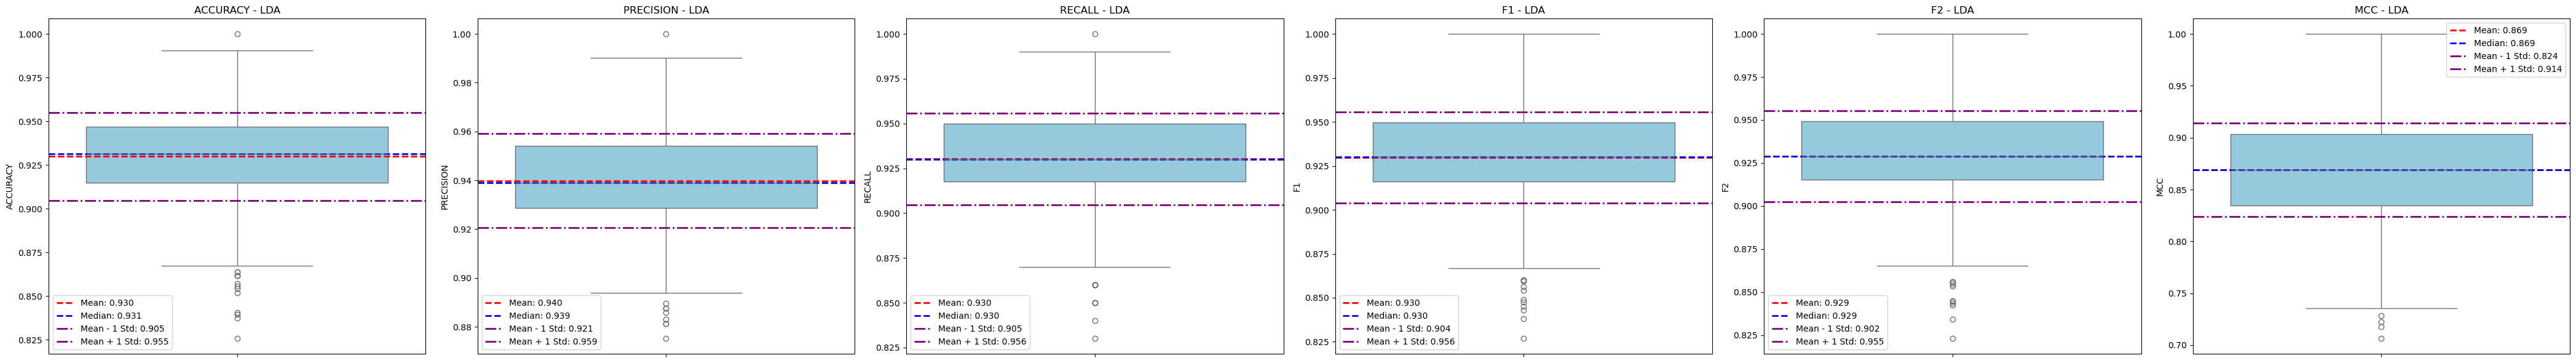

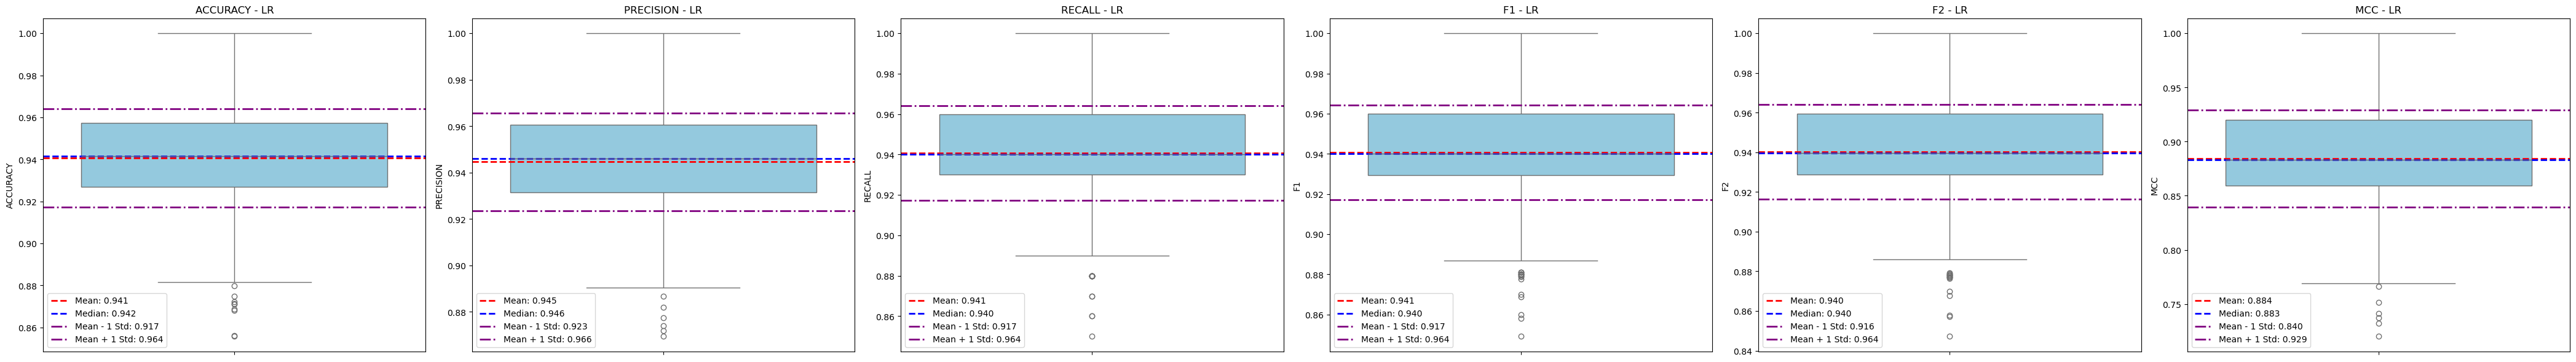

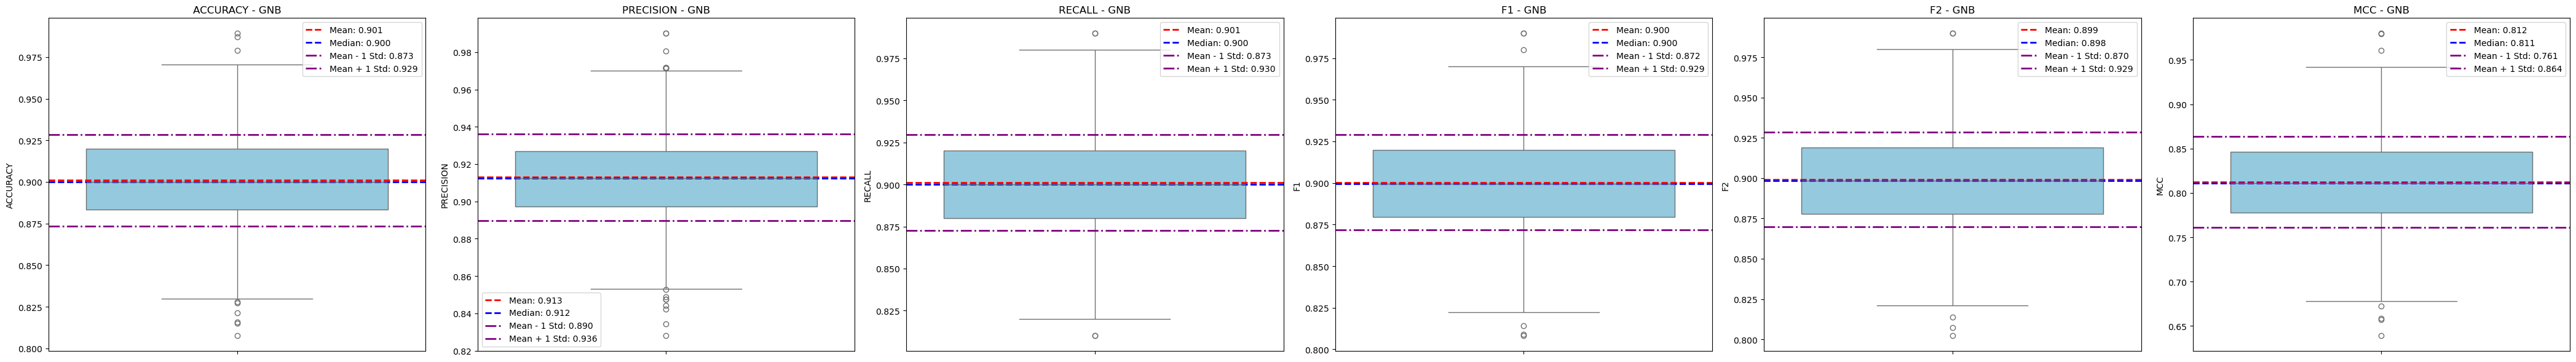

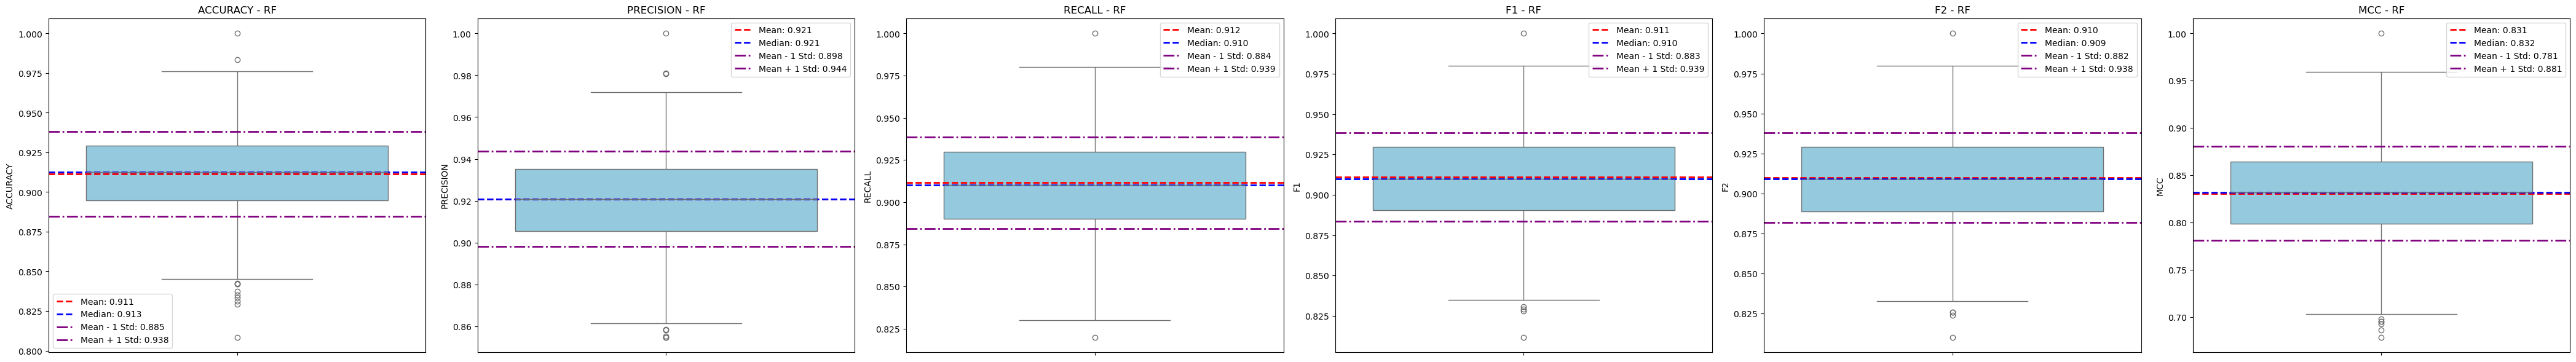

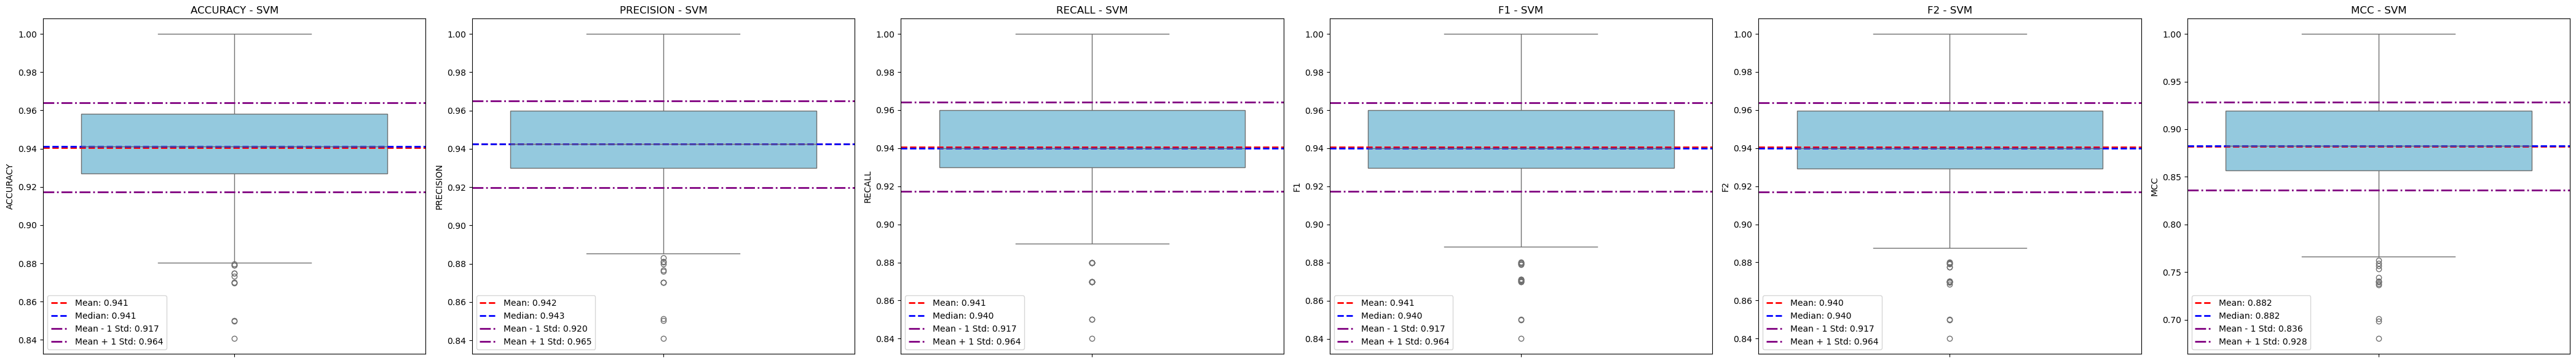

In [10]:
# Define the models you want to evaluate on the bootstrapped data on eval set (PCA)
rncv = func_classes.RNcvAtom(
    X=undersampled_dev.drop(columns=["diagnosis"]),
    y=undersampled_dev["diagnosis"],
    models=models,
    fs=True
)
rncv.bootstrap(train_set=undersampled_dev, eval_set=test_df)
results = rncv.get_bootstrap_results()
results.to_csv(root/'data'/'bootstrap_results_PCA_10_undersampled.csv', index=False)

utils = func_classes.Utils()
for model in models:
    utils.create_boxplot(
        df=results,
        model_name=model,
        metrics=metrics
    )

Processing fold: 0
<< ================== ATOM ================== >>

Configuration ==================== >>
Algorithm task: Binary classification.

Dataset stats ==================== >>
Shape: (225, 11)
Train set size: 180
Test set size: 45
-------------------------------------
Memory: 19.93 kB
Scaled: False
Outlier values: 27 (1.4%)


Training ========================= >>
Models: LR
Metric: fbeta_score


Running hyperparameter tuning for LogisticRegression...
| trial | penalty |       C |  solver | max_iter | l1_ratio | fbeta_score | best_fbeta_score | time_trial | time_ht |    state |
| ----- | ------- | ------- | ------- | -------- | -------- | ----------- | ---------------- | ---------- | ------- | -------- |
| 0     |      l1 |   0.006 | libli.. |      110 |      1.0 |      0.4167 |           0.4167 |     0.042s |  0.042s | COMPLETE |
| 1     |    None |  0.0332 |     sag |      360 |      0.4 |      0.9325 |           0.9325 |     0.046s |  0.089s | COMPLETE |
| 2     |      l1 | 

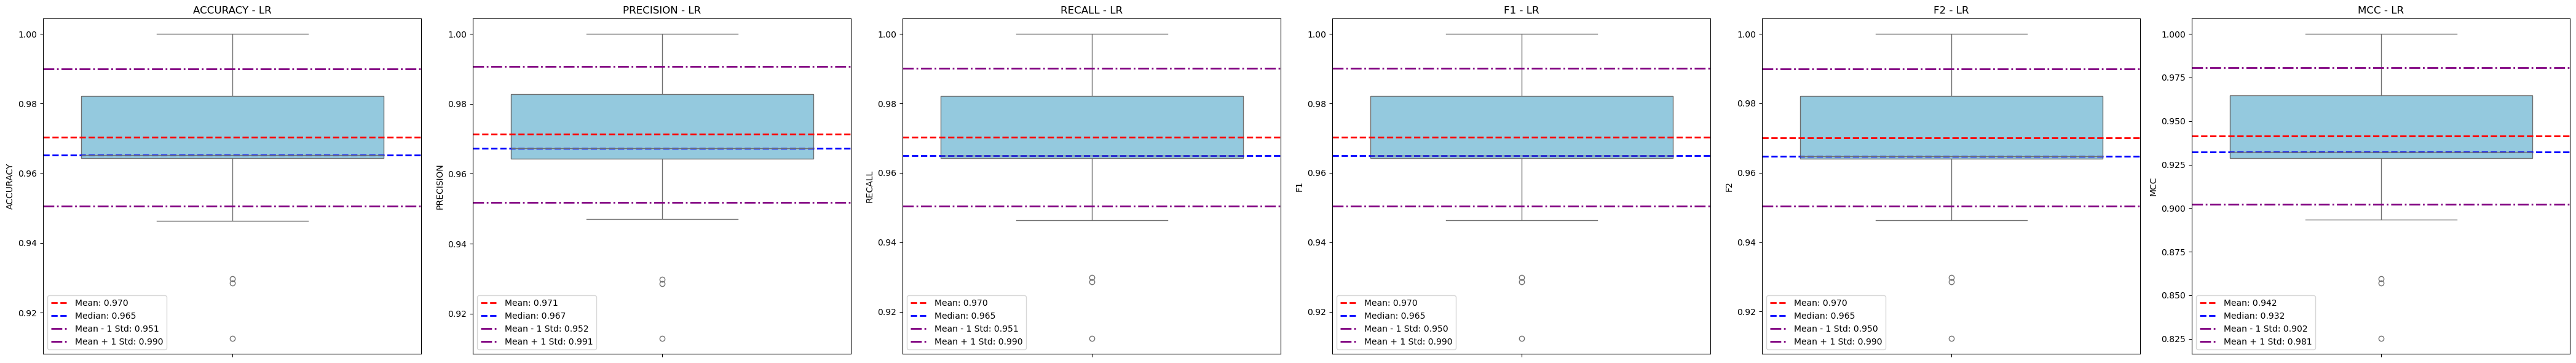

In [11]:
# Define the model to fine-tune
models = ['LR']

# Define the metrics you want to evaluate
metrics = ["accuracy", "precision", "recall", "f1", "f2", "mcc"]

# Create a new RNcvAtom instance
rncv = func_classes.RNcvAtom(
    X=undersampled_dev.drop(columns=["diagnosis"]),
    y=undersampled_dev["diagnosis"],
    models=models,
    fs=True
)

rncv.fine_tune(model=['LR'])
best_results = rncv.get_best_model_results()
best_results.to_csv(root/'data'/'best_model_results_PCA_10_undersampled.csv', index=False)
utils = func_classes.Utils()
# Plot all fine-tuned models across folds
for model in models:
    utils.create_boxplot(
        df=best_results,
        model_name=model,
        metrics=metrics
    )


 Analyzing: model
model
LR    50
Name: count, dtype: int64

 Analyzing: fold


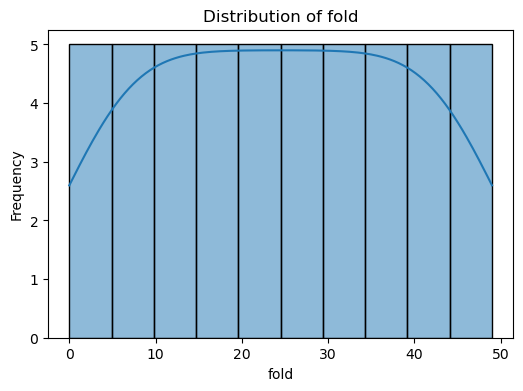


 Analyzing: accuracy


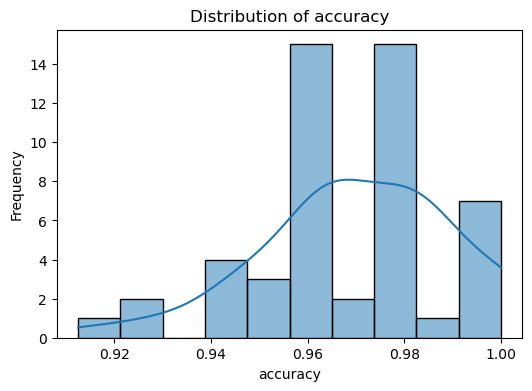


 Analyzing: precision


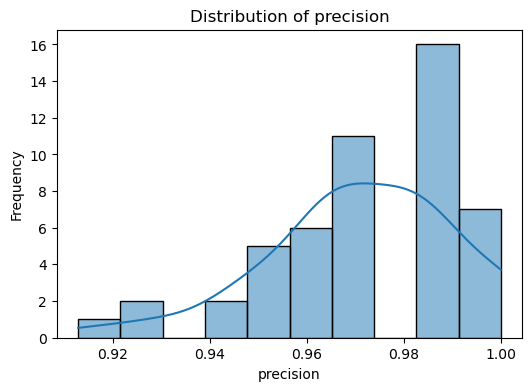


 Analyzing: recall


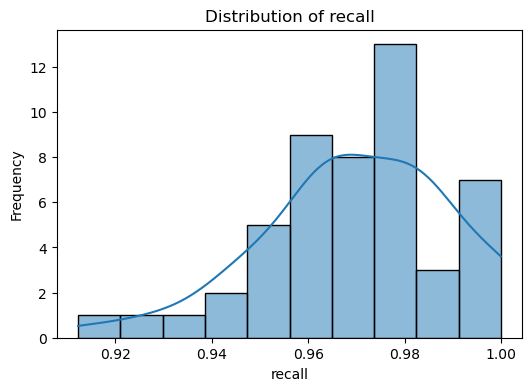


 Analyzing: f1


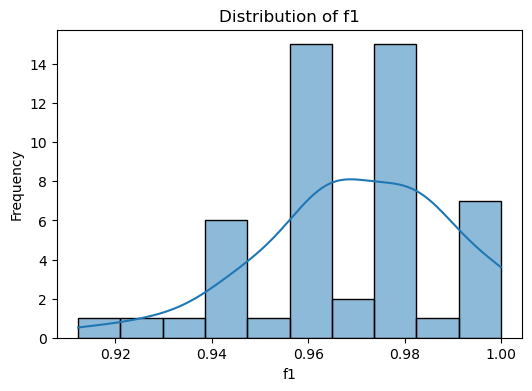


 Analyzing: f2


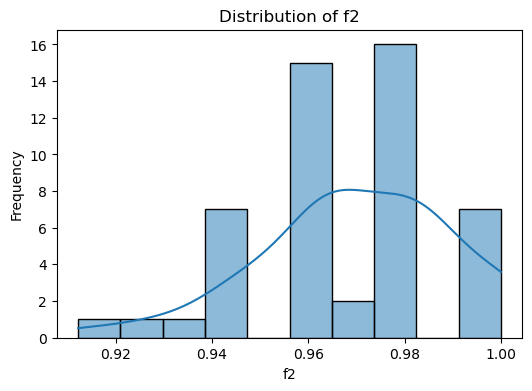


 Analyzing: mcc


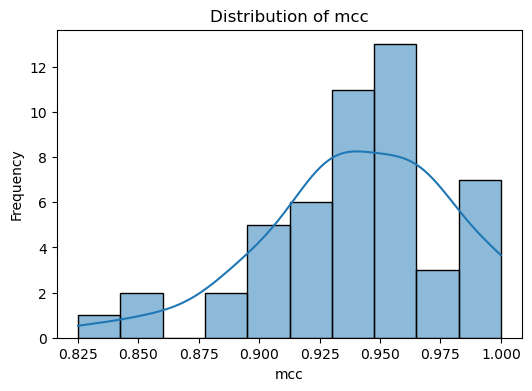


 Analyzing: C


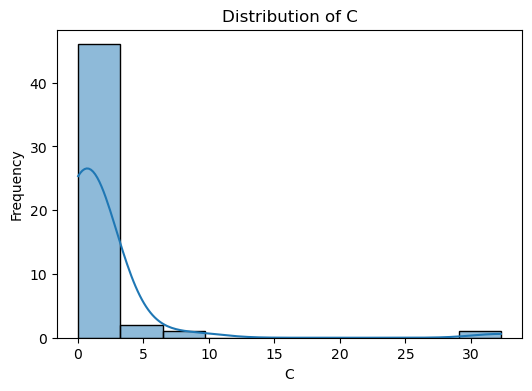


 Analyzing: class_weight
Series([], Name: count, dtype: int64)

 Analyzing: dual


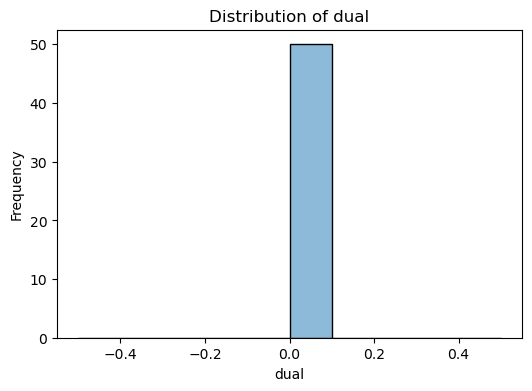


 Analyzing: fit_intercept


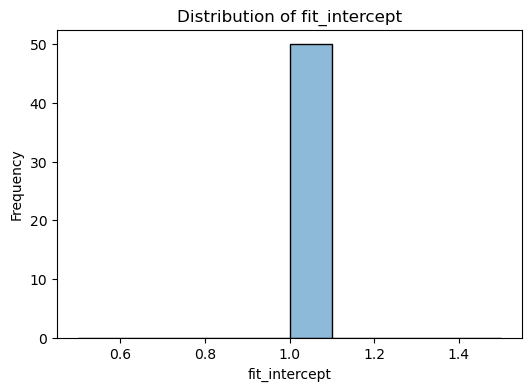


 Analyzing: intercept_scaling


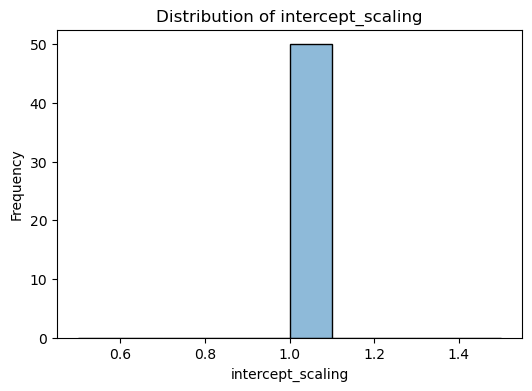


 Analyzing: l1_ratio


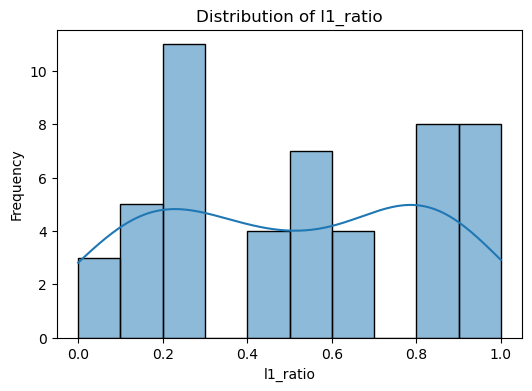


 Analyzing: max_iter


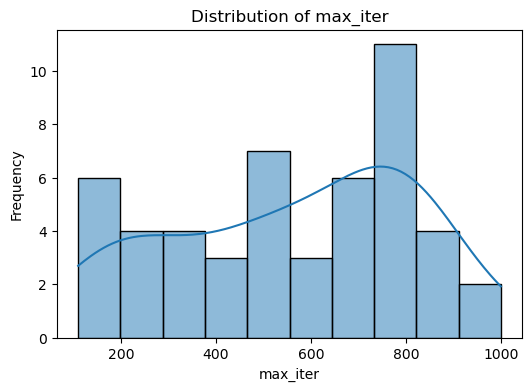


 Analyzing: multi_class
multi_class
deprecated    50
Name: count, dtype: int64

 Analyzing: n_jobs


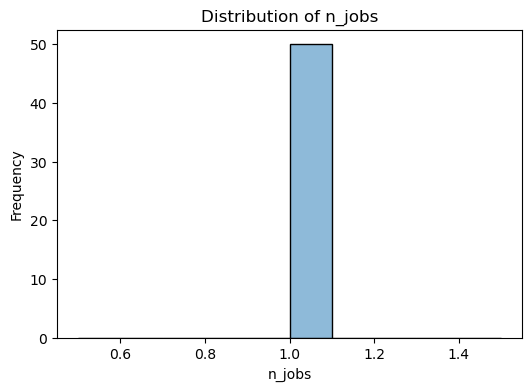


 Analyzing: penalty
penalty
l2            37
elasticnet     8
l1             5
Name: count, dtype: int64

 Analyzing: random_state


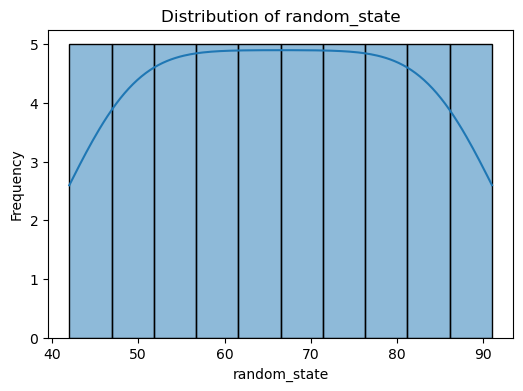


 Analyzing: solver
solver
saga         13
liblinear    13
newton-cg    11
sag           8
lbfgs         5
Name: count, dtype: int64

 Analyzing: tol


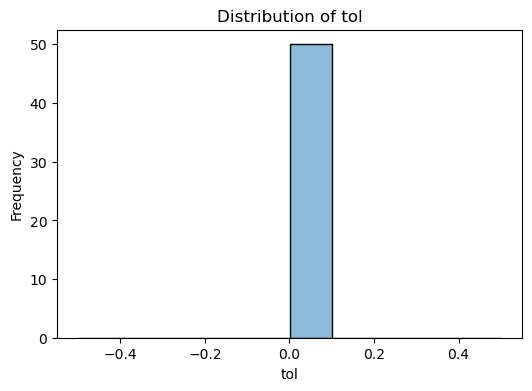


 Analyzing: verbose


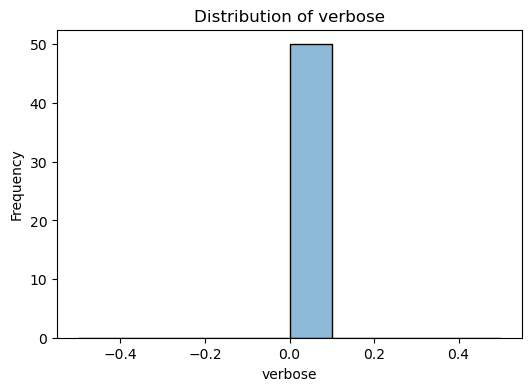


 Analyzing: warm_start


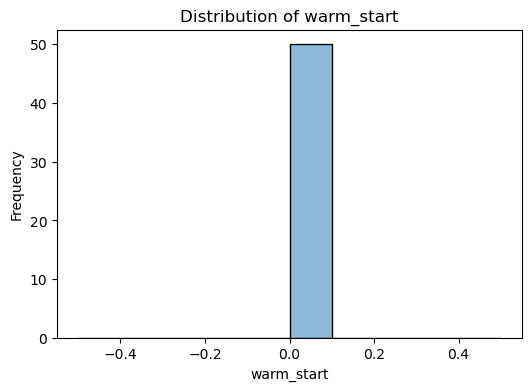

In [12]:
# Get the distribution of each hyperparameter across folds to decide the best model
optuna_res = pd.read_csv(root/'data'/'best_model_results_PCA_10_undersampled.csv', header=0)
utils = func_classes.Utils()
full_df = utils.process_optuna_results(optuna_res)
utils.plot_optuna_results(full_df)

Processing fold: 0
<< ================== ATOM ================== >>

Configuration ==================== >>
Algorithm task: Binary classification.

Dataset stats ==================== >>
Shape: (225, 11)
Train set size: 180
Test set size: 45
-------------------------------------
Memory: 19.93 kB
Scaled: False
Outlier values: 27 (1.4%)


Training ========================= >>
Models: LR
Metric: fbeta_score


Results for LogisticRegression:
Fit ---------------------------------------------
Train evaluation --> fbeta_score: 0.9889
Test evaluation --> fbeta_score: 0.9777
Time elapsed: 0.014s
-------------------------------------------------
Time: 0.014s


Final results ==================== >>
Total time: 0.016s
-------------------------------------
LogisticRegression --> fbeta_score: 0.9777
Processing fold: 1
<< ================== ATOM ================== >>

Configuration ==================== >>
Algorithm task: Binary classification.

Dataset stats ==================== >>
Shape: (225, 11)
Tra

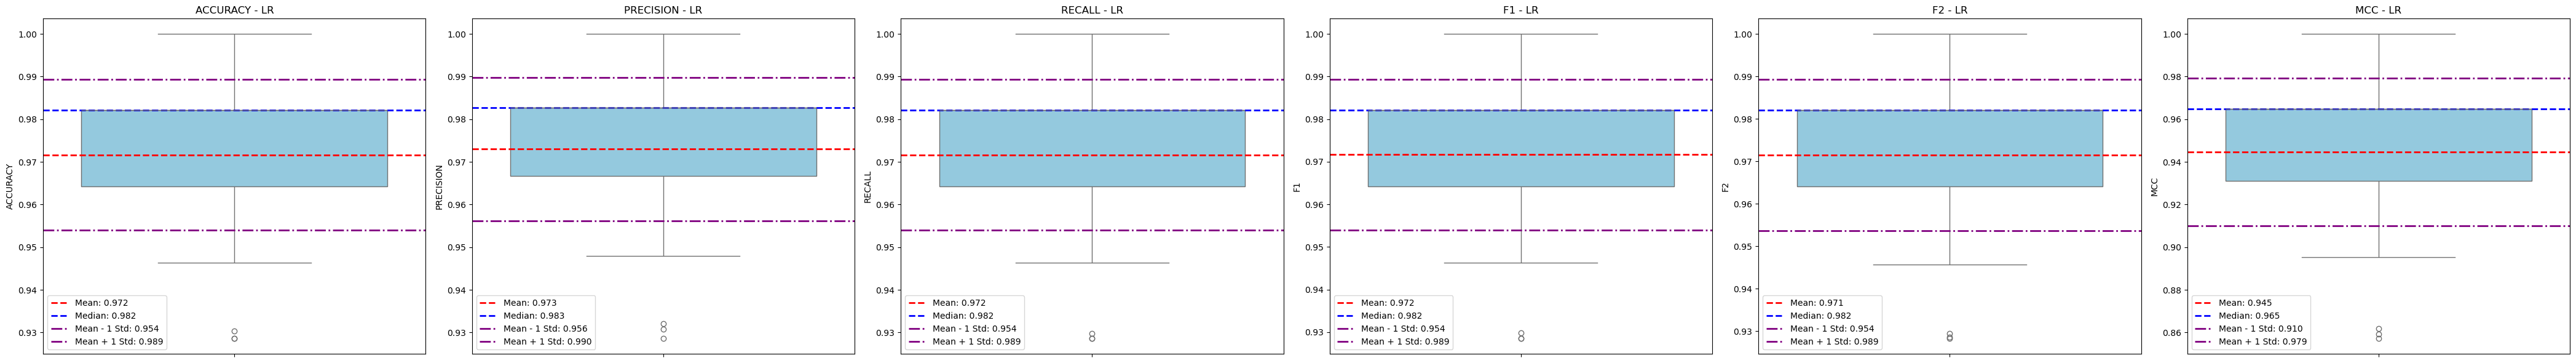

In [13]:
# Define and run the best model with kfold
model = [LogisticRegression(C=0.5, penalty='l2', solver='liblinear')]
rncv = func_classes.RNcvAtom(
    X=undersampled_dev.drop(columns=['diagnosis']), 
    y=undersampled_dev['diagnosis'], 
    models=model, 
    fs=True
    )
rncv.baseline_run(model_inst=model)
final_model_results = rncv.get_baseline_results()
utils = func_classes.Utils()
utils.create_boxplot(
    df=final_model_results, 
    model_name="LR", 
    metrics=["accuracy", "precision", "recall", "f1", "f2", "mcc"]
)

<< ================== ATOM ================== >>

Configuration ==================== >>
Algorithm task: Binary classification.

Dataset stats ==================== >>
Shape: (282, 11)
Train set size: 226
Test set size: 56
-------------------------------------
Memory: 24.95 kB
Scaled: False
Outlier values: 26 (1.0%)


Training ========================= >>
Models: LR
Metric: fbeta_score


Results for LogisticRegression:
Fit ---------------------------------------------
Train evaluation --> fbeta_score: 0.9911
Test evaluation --> fbeta_score: 0.964
Time elapsed: 0.013s
-------------------------------------------------
Time: 0.013s


Final results ==================== >>
Total time: 0.015s
-------------------------------------
LogisticRegression --> fbeta_score: 0.964


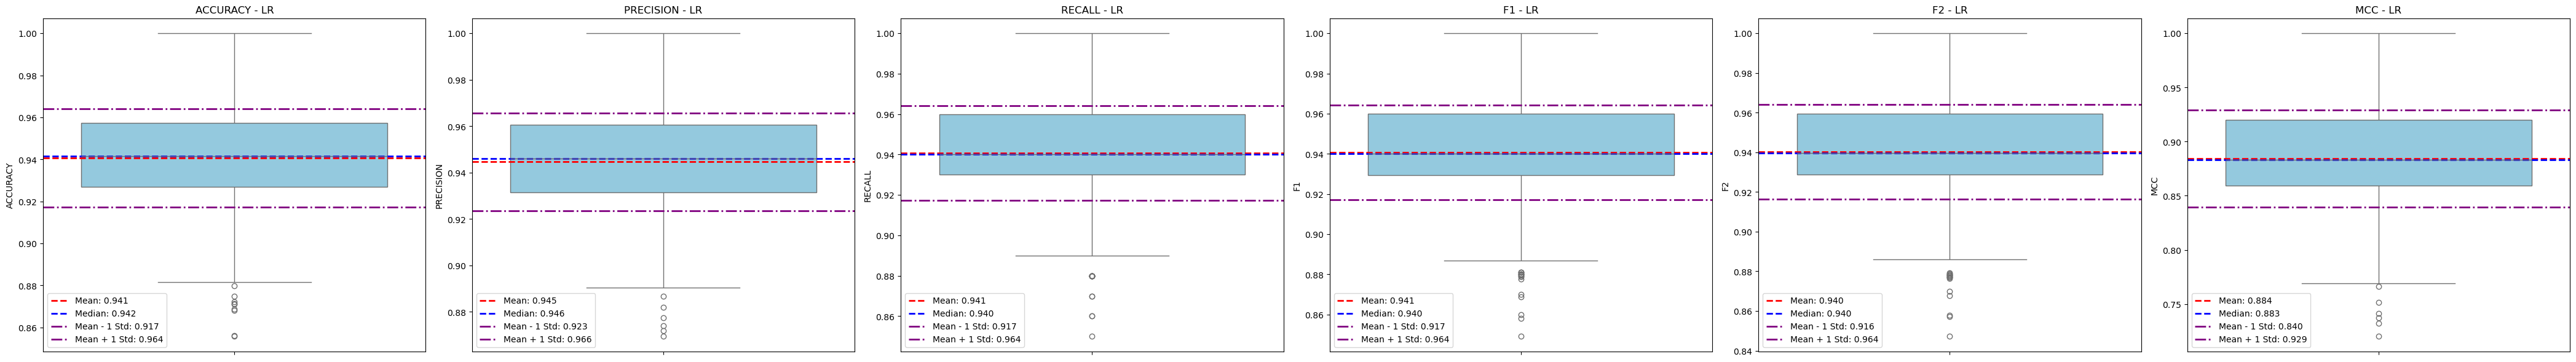

In [14]:
# Get bootstrap results of the best model
model = [LogisticRegression(C=0.5, penalty='l2', solver='liblinear')]
rncv = func_classes.RNcvAtom(
    X=undersampled_dev.drop(columns=['diagnosis']), 
    y=undersampled_dev['diagnosis'], 
    models=model, 
    fs=True
    )
rncv.bootstrap(
    train_set=undersampled_dev,
    eval_set=test_df,
    model_inst=model,
)
boot_df = rncv.get_bootstrap_results()
utils = func_classes.Utils()
utils.create_boxplot(
    df=boot_df,
    model_name="LR",
    metrics=["accuracy", "precision", "recall", "f1", "f2", "mcc"]
)

Processing fold: 0
<< ================== ATOM ================== >>

Configuration ==================== >>
Algorithm task: Binary classification.

Dataset stats ==================== >>
Shape: (225, 11)
Train set size: 180
Test set size: 45
-------------------------------------
Memory: 19.93 kB
Scaled: False
Outlier values: 27 (1.4%)


Training ========================= >>
Models: LR
Metric: fbeta_score


Results for LogisticRegression:
Fit ---------------------------------------------
Train evaluation --> fbeta_score: 0.9889
Test evaluation --> fbeta_score: 0.9777
Time elapsed: 0.014s
-------------------------------------------------
Time: 0.014s


Final results ==================== >>
Total time: 0.016s
-------------------------------------
LogisticRegression --> fbeta_score: 0.9777
Processing fold: 1
<< ================== ATOM ================== >>

Configuration ==================== >>
Algorithm task: Binary classification.

Dataset stats ==================== >>
Shape: (225, 11)
Tra

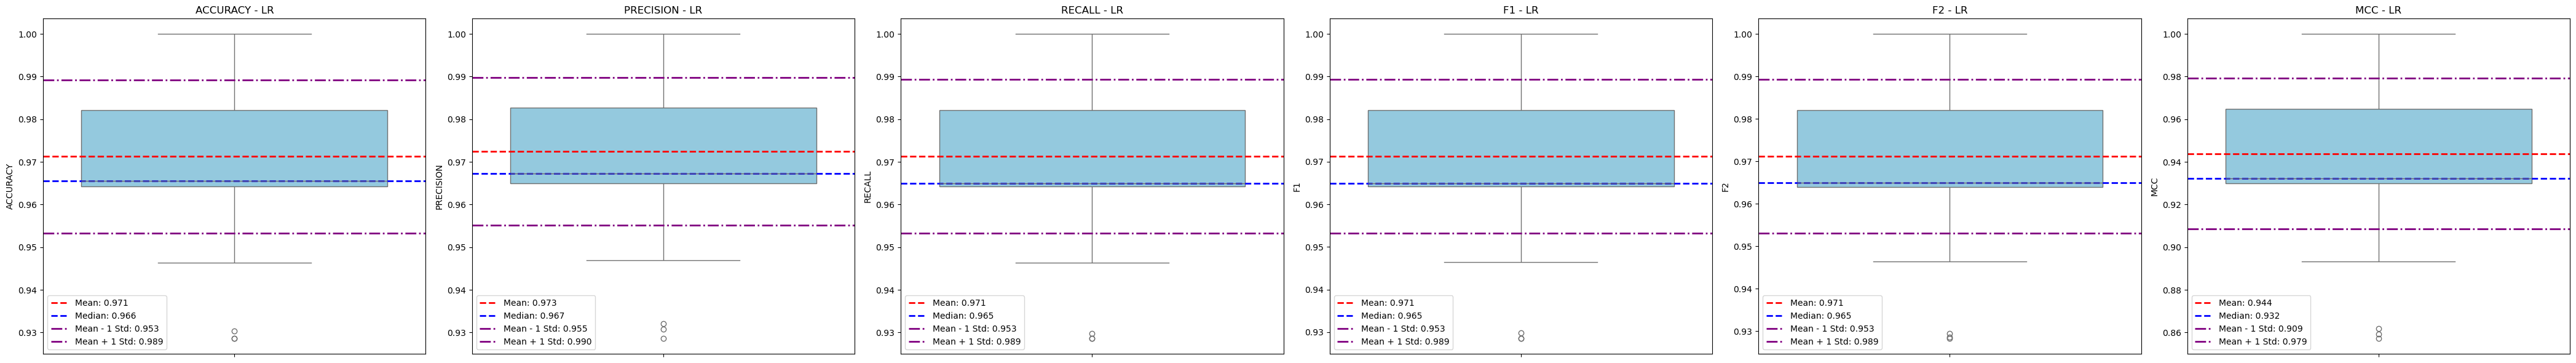

In [15]:
# Define and run the best model with kfold
model = [LogisticRegression(C=0.5, penalty='l2', solver='saga')]
rncv = func_classes.RNcvAtom(
    X=undersampled_dev.drop(columns=['diagnosis']), 
    y=undersampled_dev['diagnosis'], 
    models=model, 
    fs=True
    )
rncv.baseline_run(model_inst=model)
final_model_results = rncv.get_baseline_results()
utils = func_classes.Utils()
utils.create_boxplot(
    df=final_model_results, 
    model_name="LR", 
    metrics=["accuracy", "precision", "recall", "f1", "f2", "mcc"]
)

<< ================== ATOM ================== >>

Configuration ==================== >>
Algorithm task: Binary classification.

Dataset stats ==================== >>
Shape: (282, 11)
Train set size: 226
Test set size: 56
-------------------------------------
Memory: 24.95 kB
Scaled: False
Outlier values: 26 (1.0%)


Training ========================= >>
Models: LR
Metric: fbeta_score


Results for LogisticRegression:
Fit ---------------------------------------------
Train evaluation --> fbeta_score: 0.9867
Test evaluation --> fbeta_score: 0.964
Time elapsed: 0.015s
-------------------------------------------------
Time: 0.015s


Final results ==================== >>
Total time: 0.018s
-------------------------------------
LogisticRegression --> fbeta_score: 0.964


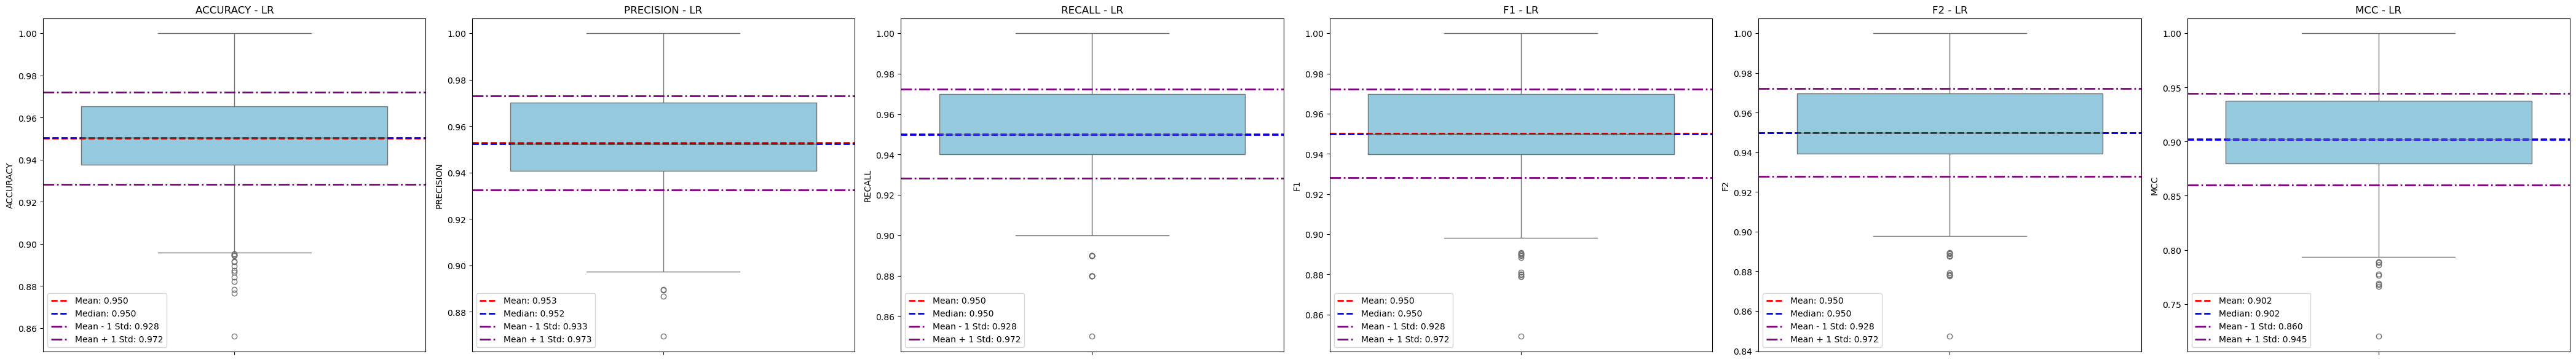

In [16]:
# Get bootstrap results of the best model
model = [LogisticRegression(C=0.5, penalty='l2', solver='saga')]
rncv = func_classes.RNcvAtom(
    X=undersampled_dev.drop(columns=['diagnosis']), 
    y=undersampled_dev['diagnosis'], 
    models=model, 
    fs=True
    )
rncv.bootstrap(
    train_set=undersampled_dev,
    eval_set=test_df,
    model_inst=model,
)
boot_df = rncv.get_bootstrap_results()
utils = func_classes.Utils()
utils.create_boxplot(
    df=boot_df,
    model_name="LR",
    metrics=["accuracy", "precision", "recall", "f1", "f2", "mcc"]
)